In [1]:
!python -m venv my_env

In [2]:
import numpy as np
import pandas as pd
import datatable as dt
from datatable import f
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, det_curve
from sklearn.datasets import make_classification

import scipy
import statsmodels
import keras
import nltk
import torch
import tensorflow
import pipe
import pprint
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kevin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kevin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

In [3]:
df = pd.read_csv('simulated_data.csv')
df.tail()

id diagnosis   area_mean  area_worst  compactness_mean  \
14272  92751         B  164.130895  164.130895          0.045051   
14273  92751         B  201.310953  201.310953          0.040230   
14274  92751         B  171.792439  171.792439          0.045287   
14275  92751         B  168.373681  168.373681          0.036249   
14276  92751         B  164.705799  164.705799          0.039615   

       compactness_worst  concave points_mean  concave points_worst  \
14272           0.045051                  0.0                   0.0   
14273           0.040230                  0.0                   0.0   
14274           0.045287                  0.0                   0.0   
14275           0.036249                  0.0                   0.0   
14276           0.039615                  0.0                   0.0   

       concavity_mean  concavity_worst  fractal_dimension_mean  \
14272             0.0              0.0                0.056146   
14273             0.0              0.0                0.057780   
14274             0.0              0.0                0.060658   
14275             0.0              0.0                0.058009   
14276             0.0              0.0                0.060972   

       fractal_dimension_worst  perimeter_mean  perimeter_worst  radius_mean  \
14272                 0.056146       45.892093        45.892093     7.789452   
14273                 0.057780       50.638020        50.638020     7.861976   
14274                 0.060658       46.727636        46.727636     7.306300   
14275                 0.058009       51.212123        51.212123     8.162515   
14276                 0.060972       45.776702        45.776702     7.811408   

       radius_worst  smoothness_mean  smoothness_worst  symmetry_mean  \
14272      7.789452         0.055194          0.055194       0.170003   
14273      7.861976         0.042708          0.042708       0.164168   
14274      7.306300         0.059848          0.059848       0.153404   
14275      8.162515         0.057474          0.057474       0.101048   
14276      7.811408         0.047629          0.047629       0.189983   

       symmetry_worst  texture_mean  texture_worst test_group  
14272        0.170003     24.873812      24.873812      train  
14273        0.164168     26.296062      26.296062      train  
14274        0.153404     25.429555      25.429555      train  
14275        0.101048     27.657507      27.657507      train  
14276        0.189983     23.555447      23.555447      train

In [4]:
columns_for_model = [col for col in df.columns.tolist() if '_mean' in col]
X_train = df[df.test_group == 'train'][columns_for_model]
X_test = df[df.test_group == 'test'][columns_for_model]
y_train = df[df.test_group == 'train'].diagnosis
y_test = df[df.test_group == 'test'].diagnosis

In [5]:
base_model = RandomForestClassifier(random_state=55)

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=55), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

In [6]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
43        2.796813      0.314157         0.034192        0.015366   
42        1.196472      0.024207         0.014696        0.001268   
4         6.268657      0.200252         0.055513        0.005534   
112       6.517054      0.211601         0.067083        0.024169   
148       6.570961      0.203673         0.055288        0.002627   
184       6.918880      0.364433         0.061683        0.005484   
76        6.589417      0.244200         0.054806        0.002030   
82        6.167587      0.170423         0.069254        0.024670   
39        5.244915      0.330955         0.055765        0.014463   
147       5.498835      0.138650         0.046402        0.003559   
111       5.070854      0.105984         0.045126        0.001120   
183       5.531481      0.266772         0.050902        0.000548   
3         5.117010      0.135822         0.044362        0.001733   
113       7.887260      0.171641         0.068226        0.003522   
149       7.735431      0.197614         0.064876        0.002745   
185       8.705362      0.294474         0.079365        0.010521   
5         7.437713      0.181149         0.061949        0.002716   
22        5.776274      0.105797         0.052562        0.001641   
166       7.346241      0.921544         0.062948        0.011212   
130       7.295771      0.213439         0.057992        0.003166   
202       6.813046      0.514268         0.064421        0.008063   
94        6.029529      0.164926         0.052439        0.002823   
117       4.988527      0.126738         0.044685        0.001408   
9         4.895934      0.168913         0.045421        0.004015   
153       4.895876      0.120854         0.046450        0.002321   
189       5.480595      0.325678         0.051013        0.004455   
44        3.801761      0.211101         0.034839        0.002131   
10        6.217482      0.160755         0.055337        0.002837   
118       6.159008      0.151012         0.066175        0.014273   
190       7.416211      0.760849         0.066929        0.006166   
154       6.130589      0.146625         0.055528        0.002647   
38        3.660080      0.125438         0.033293        0.000698   
110       3.818833      0.089262         0.036442        0.002626   
2         3.702335      0.085732         0.035000        0.002403   
146       4.444727      0.253688         0.038406        0.005246   
182       4.626325      0.159491         0.044123        0.004620   
41        8.149512      0.435101         0.085630        0.027890   
83        8.469460      0.523662         0.075981        0.010176   
181       3.185179      0.338751         0.031350        0.002735   
145       2.688116      0.065352         0.029950        0.005315   
1         2.457405      0.080487         0.025002        0.000789   
109       2.546960      0.061246         0.025455        0.001510   
77        7.592967      0.165183         0.066278        0.001067   
40        7.061745      0.717834         0.055709        0.007568   
163       2.633807      0.199281         0.028238        0.004675   
91        2.374761      0.059404         0.024056        0.001066   
199       2.860493      0.497846         0.031464        0.005182   
127       2.600012      0.119931         0.024662        0.000960   
19        2.351392      0.039068         0.024115        0.001381   
90        1.179674      0.023549         0.014272        0.000926   
131       7.644429      0.171432         0.066035        0.006143   
126       1.411981      0.175360         0.022176        0.009976   
198       1.747119      0.606596         0.038936        0.027323   
203       8.008230      0.491050         0.072413        0.004131   
167       7.418051      0.289426         0.079160        0.033510   
162       1.246463      0.046241         0.014218        0.000642   
23        6.923907      0.147574         0.061707        0.003837   
18 

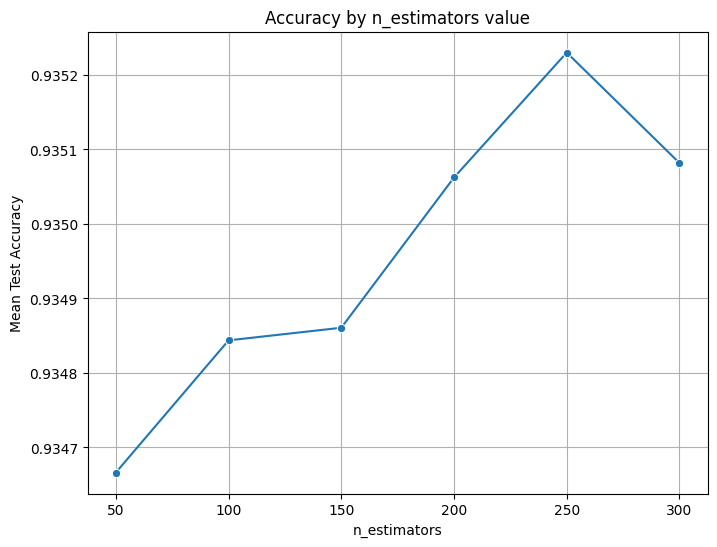

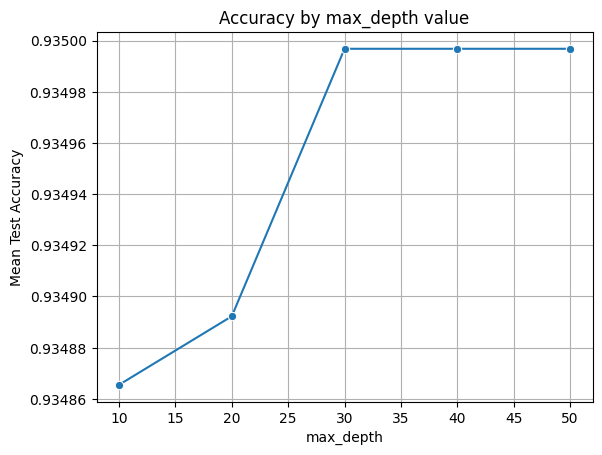

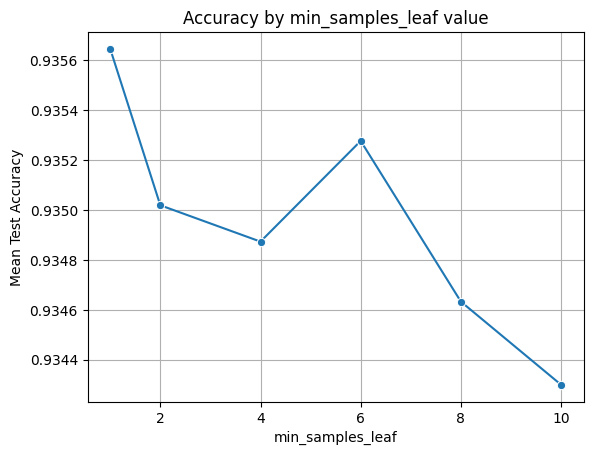

In [7]:
plt.figure(figsize=(8, 6))

for param in param_grid.keys():
    sns.lineplot(data=results.groupby('param_' + param, as_index=False).agg({'mean_test_score':'mean'}), 
                 x='param_' + param, y='mean_test_score', marker='o')
    plt.title('Accuracy by ' + param + ' value')
    plt.xlabel(param)
    plt.ylabel('Mean Test Accuracy')
    plt.grid(True)
    plt.show()

# Creating and examining the simplest model

In [5]:
simple_model = RandomForestClassifier(random_state=55,
                                     n_estimators=50, max_depth=10, min_samples_leaf=2)
simple_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=55)

## Evaluating the accuracy on the training data

In [6]:
predictions = simple_model.predict(X_train)
prediction_probs = simple_model.predict_proba(X_train)

print(f'Accuracy: {accuracy_score(y_train, predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(simple_model, X_train, y_train, cv=5))}')

Accuracy: 0.9796114805740287
Avg CV accuracy: 0.9362997294922379


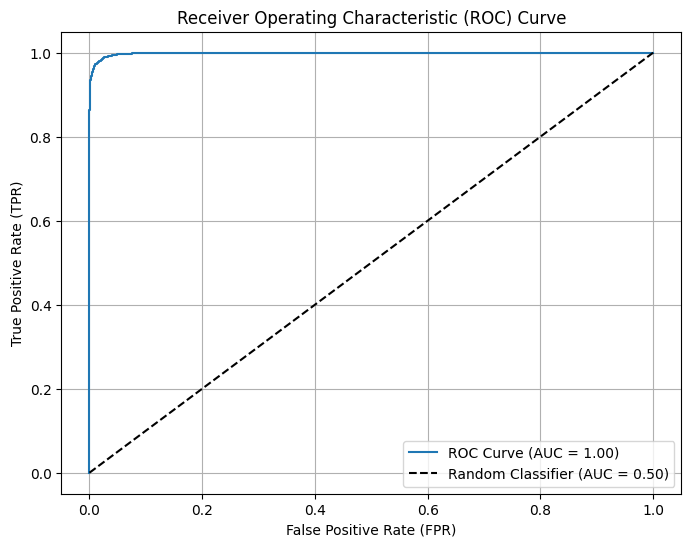

In [7]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
prediction_probs_binary = [x[1] for x in prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

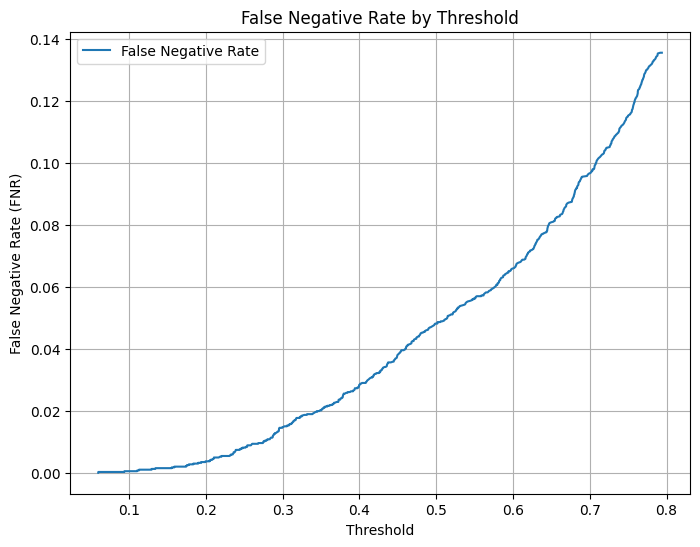

In [8]:
fpr, fnr, thresholds = det_curve(y_train_binary, prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

## Examing the false positives and false negatives

In [9]:
prediction_df = pd.DataFrame({'diagnosis': y_train, 
                              'prediction' : predictions,
                              'M_probability': [x[1] for x in prediction_probs],
                              'prediction_probability': [np.max([x[0], x[1]]) for x in prediction_probs]})

prediction_df['prediction_accuracy'] = 'TP'
prediction_df.loc[(prediction_df.diagnosis == 'B') & (prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'TN'
prediction_df.loc[(prediction_df.diagnosis == 'B') & (prediction_df.prediction == 'M'), 'prediction_accuracy'] = 'FP'
prediction_df.loc[(prediction_df.diagnosis == 'M') & (prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'FN'

grouped_by_accuracy = prediction_df.groupby('prediction_accuracy', as_index=False)
predictions_by_accuracy = grouped_by_accuracy['prediction_probability'].agg(['mean', 'std'])
predictions_by_accuracy['lower_bound'] = predictions_by_accuracy['mean'] - 1.96*predictions_by_accuracy['std']
predictions_by_accuracy['upper_bound'] = predictions_by_accuracy['mean'] + 1.96*predictions_by_accuracy['std']

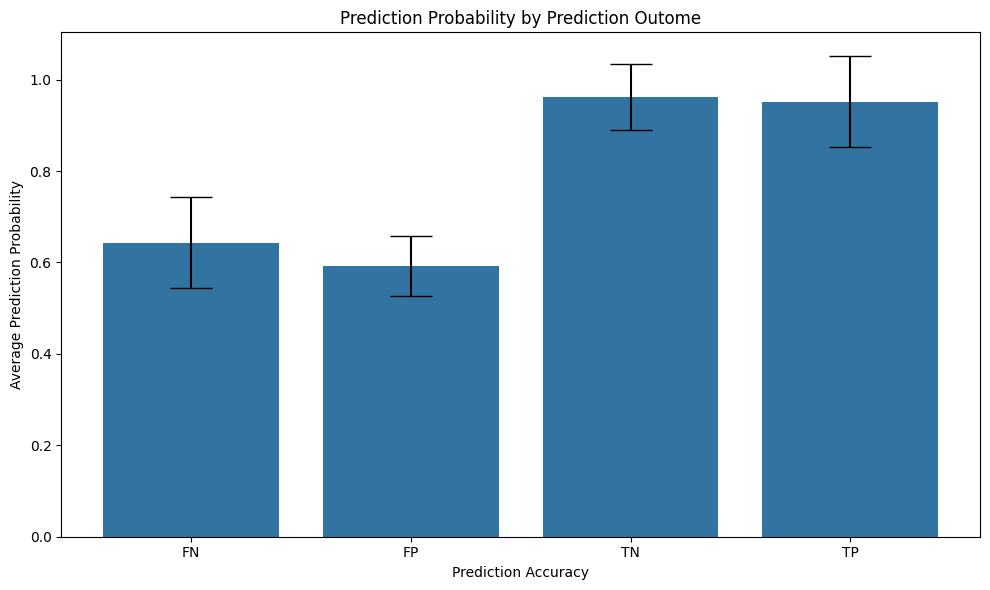

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='prediction_accuracy', y='mean', 
            data=predictions_by_accuracy)
plt.errorbar(x='prediction_accuracy', y='mean', yerr='std', fmt='none',
             data=predictions_by_accuracy, capsize=15, ecolor='k')
plt.title('Prediction Probability by Prediction Outome')
plt.xlabel('Prediction Accuracy')
plt.ylabel('Average Prediction Probability')
plt.tight_layout()
plt.show()

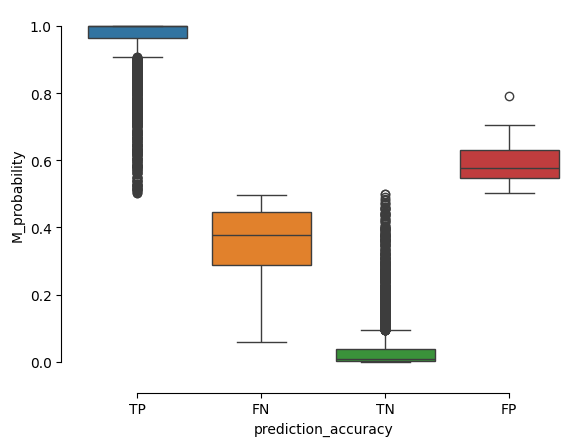

In [11]:
sns.boxplot(x="prediction_accuracy", y='M_probability',
            hue="prediction_accuracy",
            data=prediction_df)
sns.despine(offset=10, trim=True)
plt.show()

## Graphing feature importance

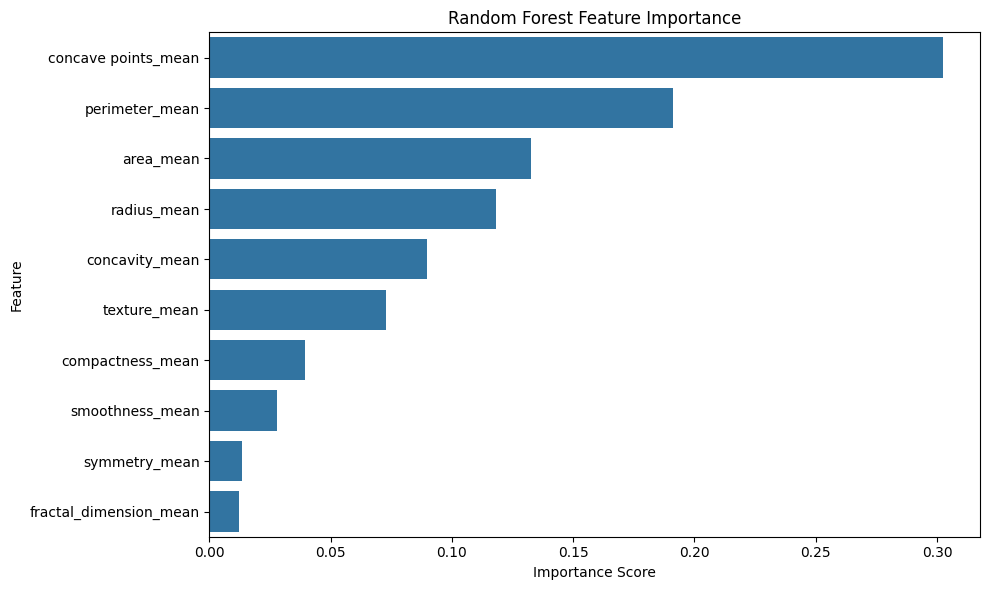

In [12]:
importances = simple_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_for_model, 'importance': importances})\
    .sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Feature Engineering

In [13]:
predictions_wide = prediction_df.merge(X_train, left_index=True, right_index=True, how='inner')
false_negatives = predictions_wide[predictions_wide.prediction_accuracy == 'FN'].copy()

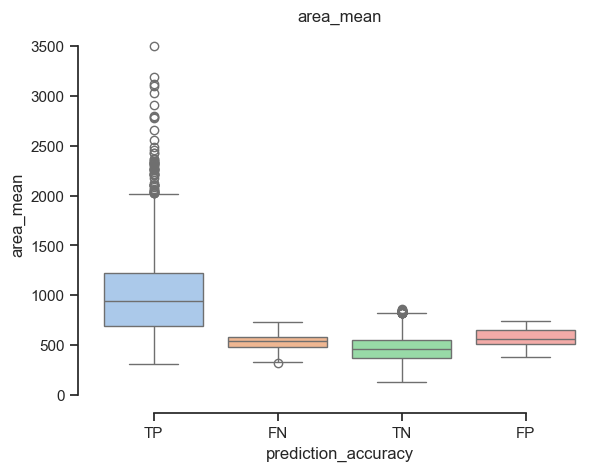

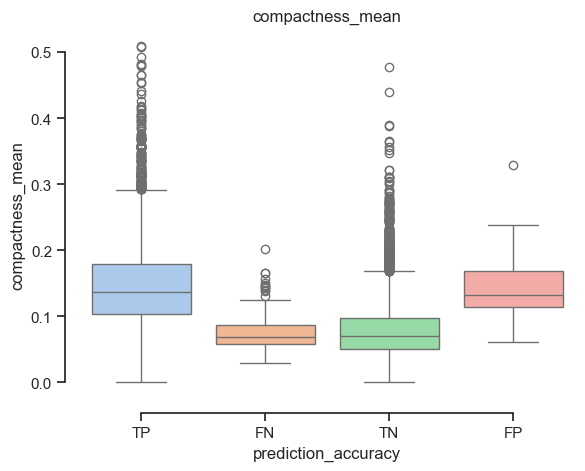

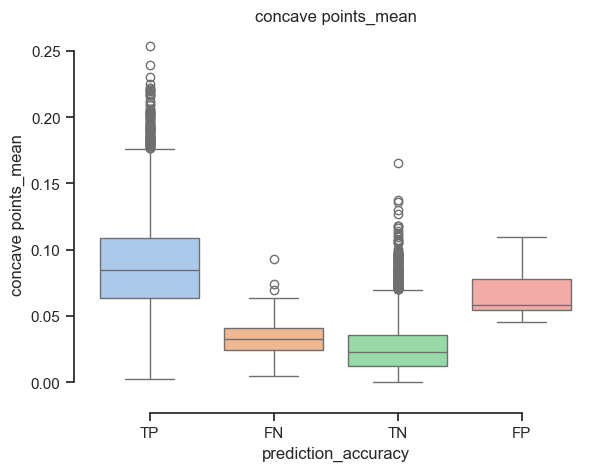

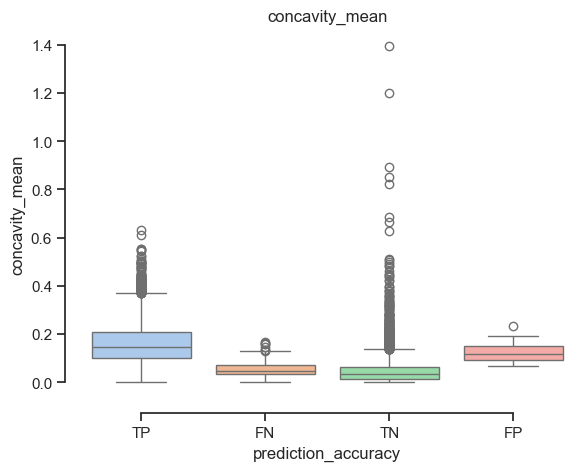

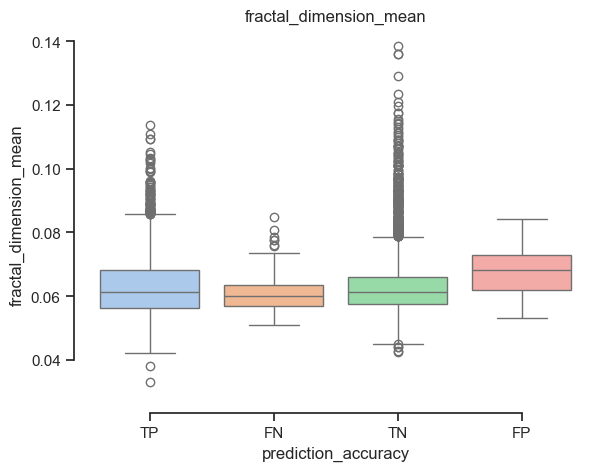

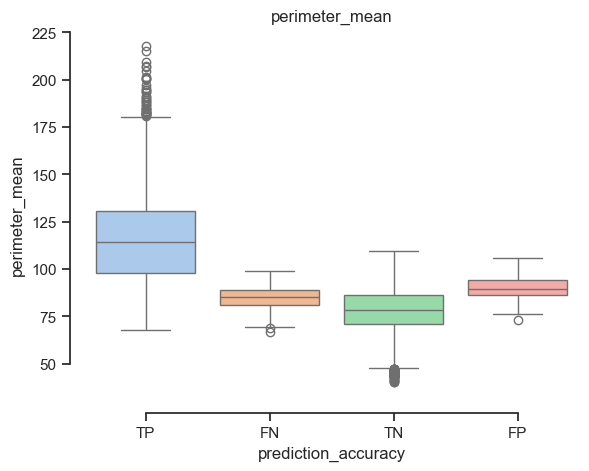

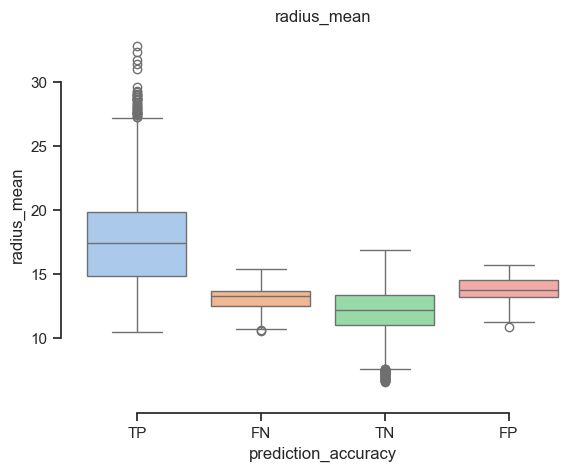

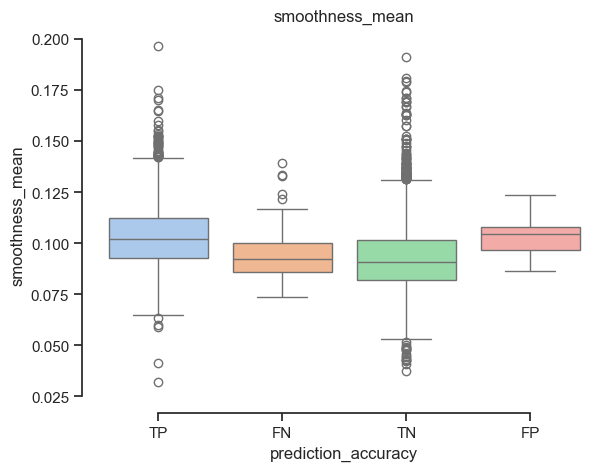

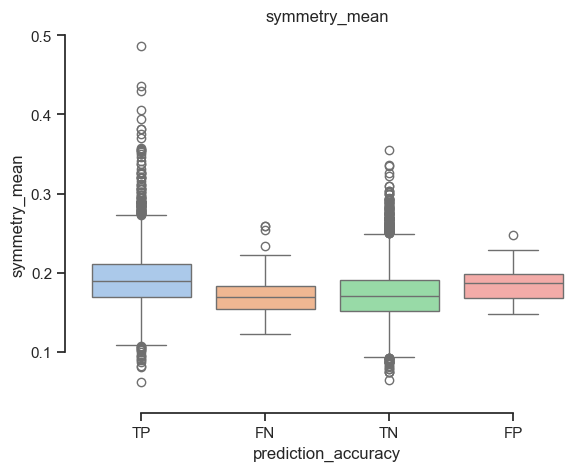

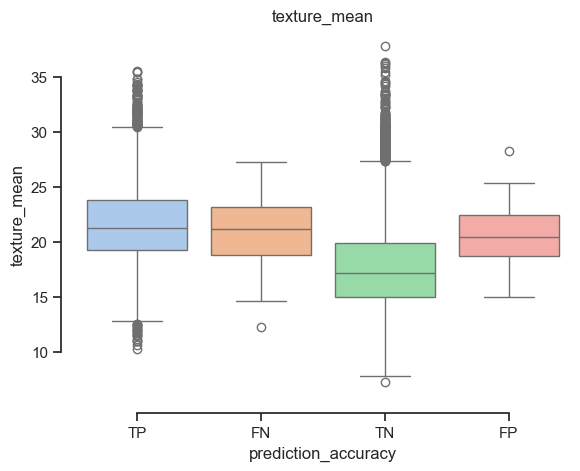

In [14]:
sns.set_theme(style="ticks", palette="pastel")
input_columns = predictions_wide.columns[5:].tolist()
input_columns.sort()

for col in input_columns:
# Draw a nested boxplot to show bills by day and time
    sns.boxplot(x='prediction_accuracy', y=col,
                hue='prediction_accuracy',
                data=predictions_wide)
    sns.despine(offset=10, trim=True)
    plt.title(f"{col}")
    plt.show()

 - area_mean - TP has a much wider spread and goes higher than the other groups
 - compactness_mean - TP and TN both have a wide spread and high values
 - concave points_mean - TP has a much wider spread and goes higher than the other groups
 - concavity_mean - TN has a much wider spread and goes higher than the other groups
 - fractal_dimension_mean - TP and TN both have a wide spread and high values
 - perimeter_mean - TP has a much wider spread and goes higher than the other groups; TN has much lower values
 - radius_mean - TP has a much wider spread and goes higher than the other groups; TN has much lower values
 - smoothness_mean - TP and TN both have a wide spread and high and low values
 - symmetry_mean - TP and TN both have a wide spread and high and low values
 - texture_mean - TN has a lower spread than FN

## Looking at feature correlation

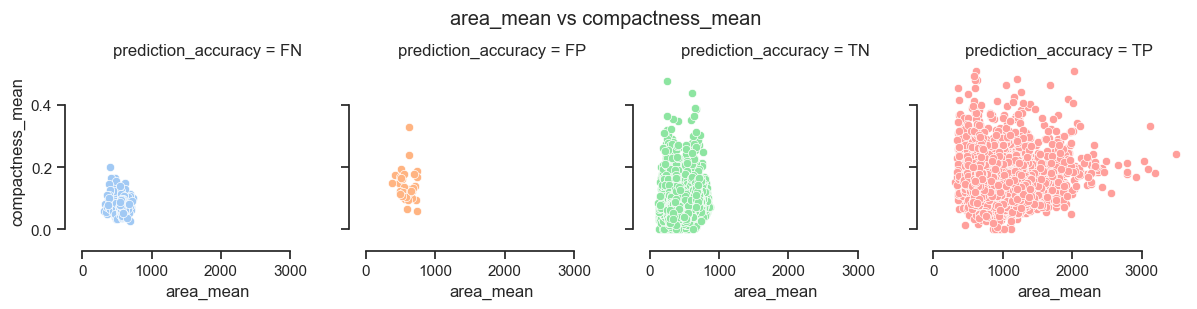

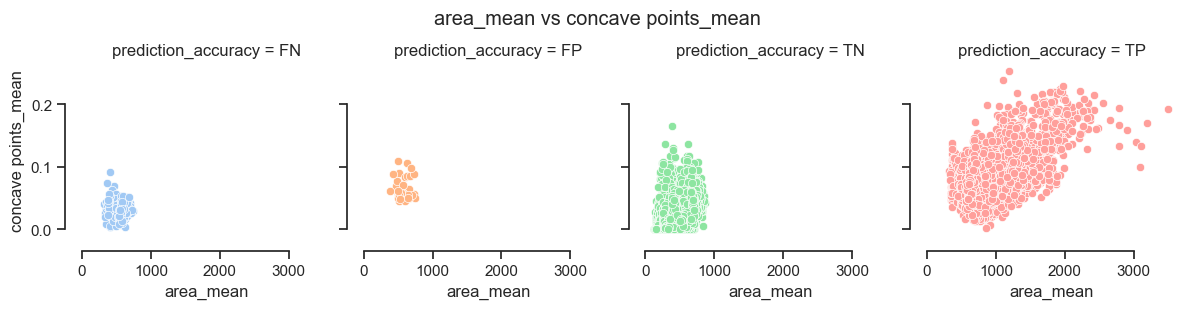

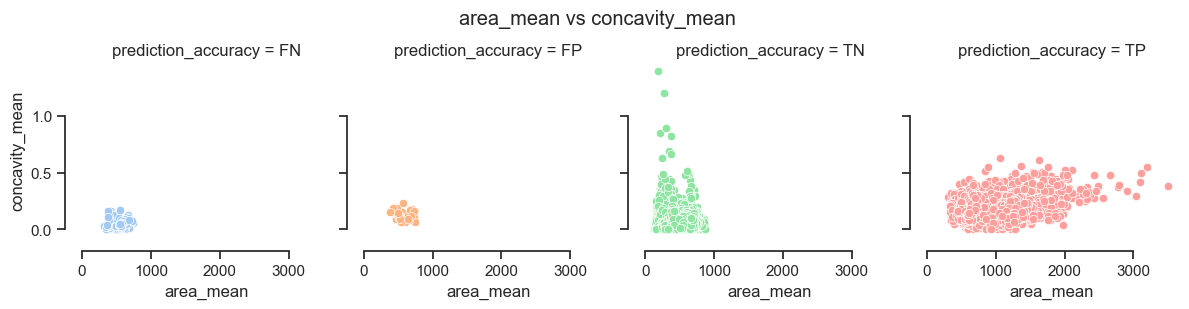

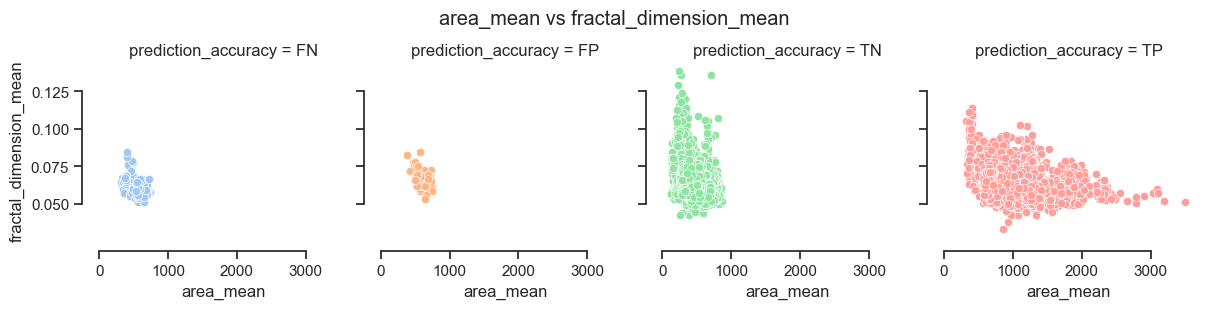

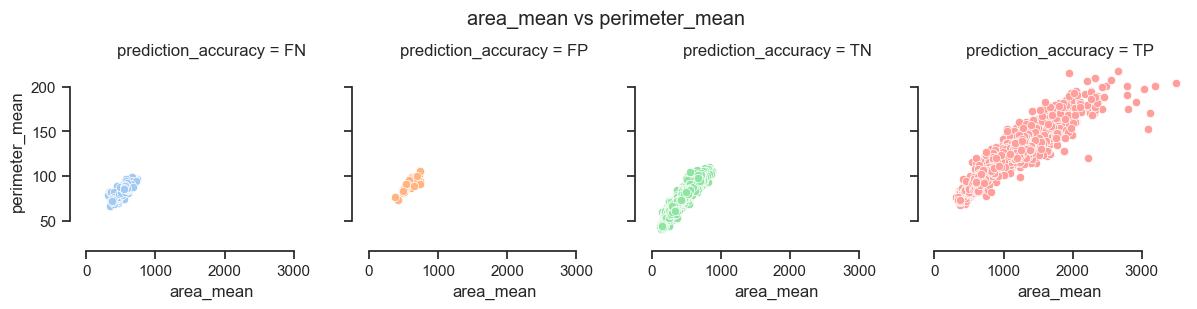

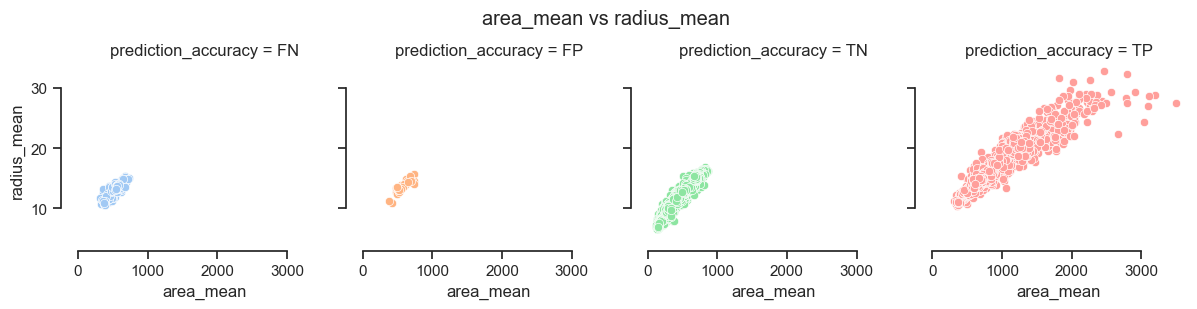

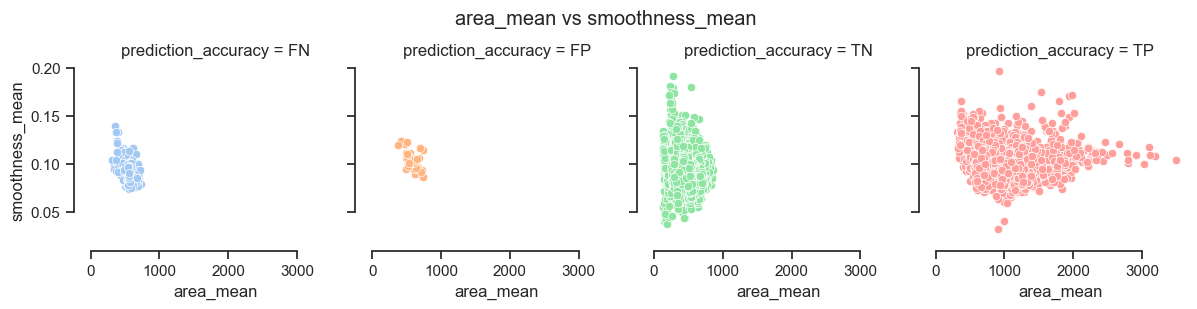

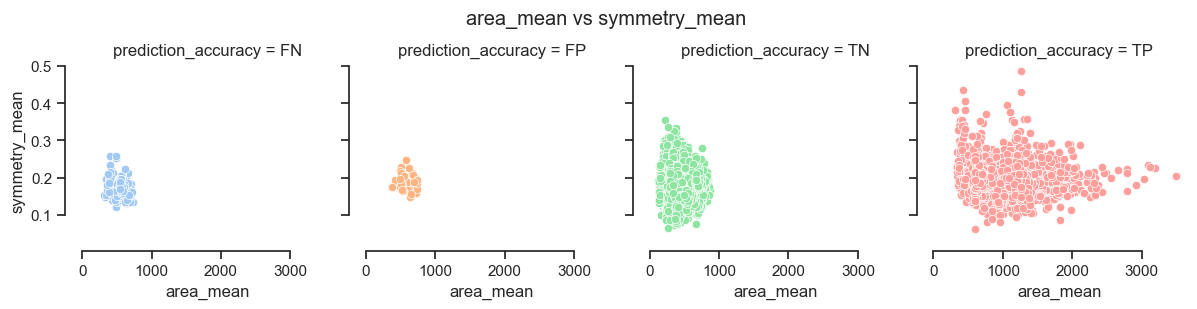

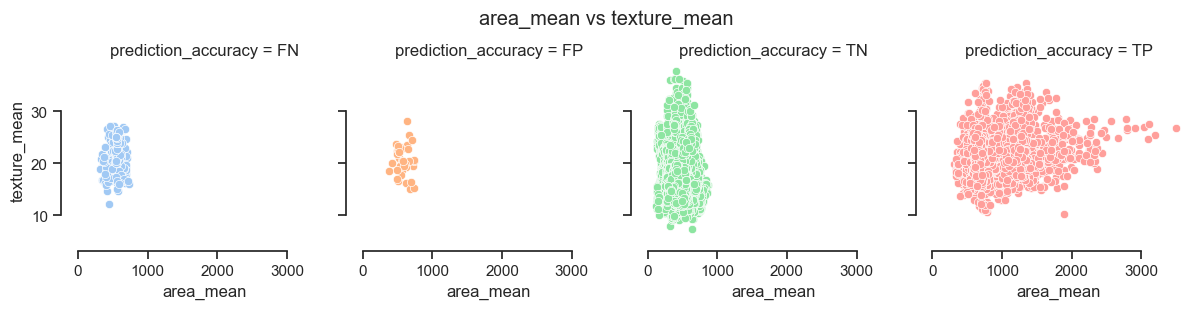

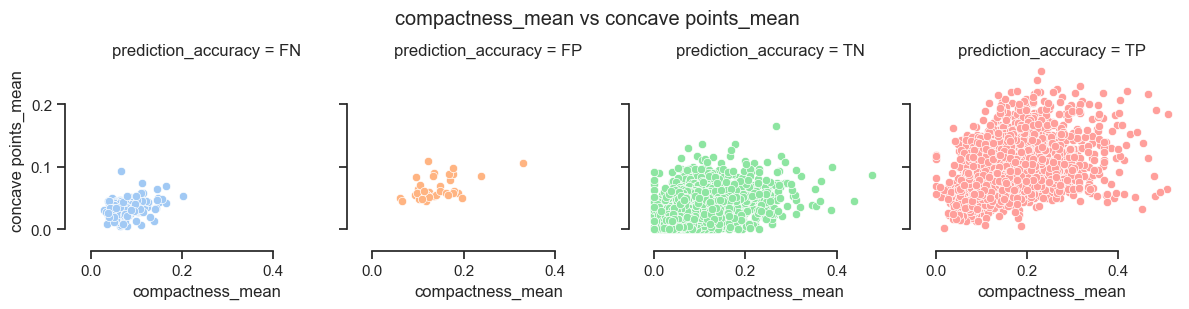

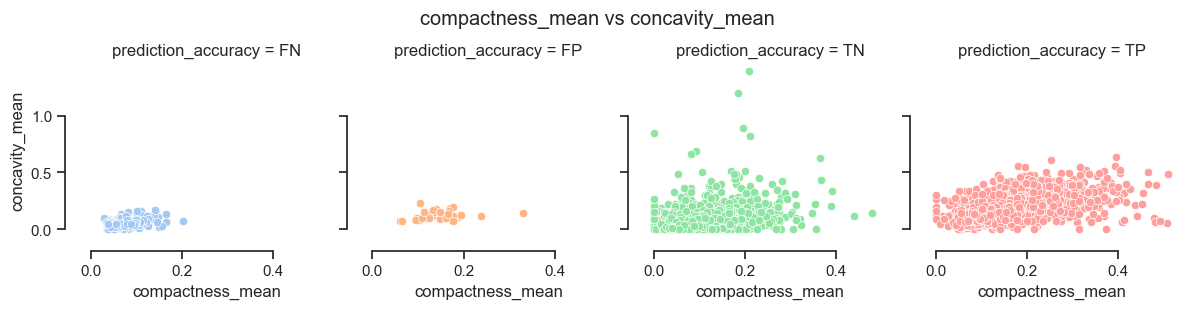

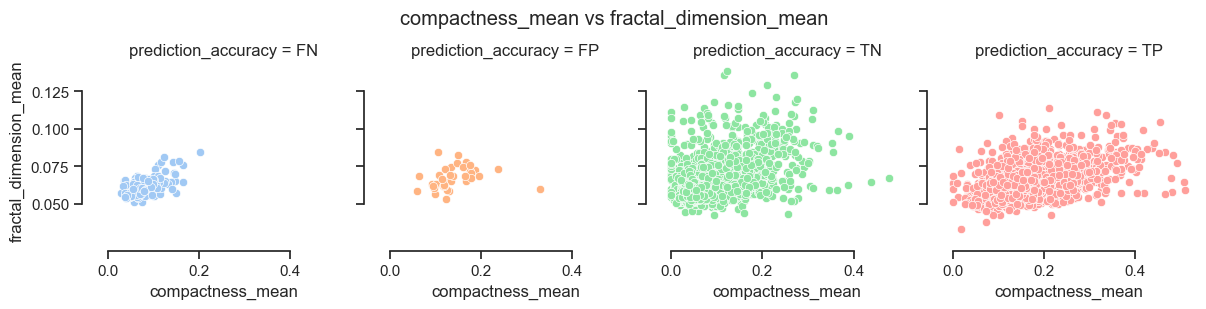

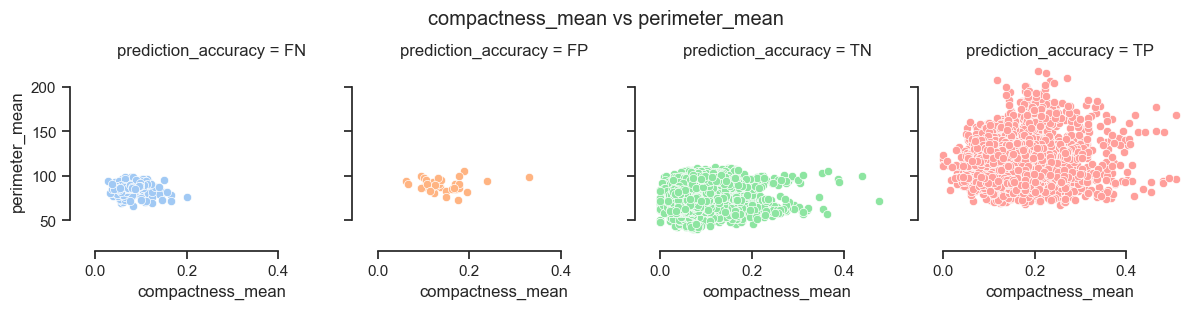

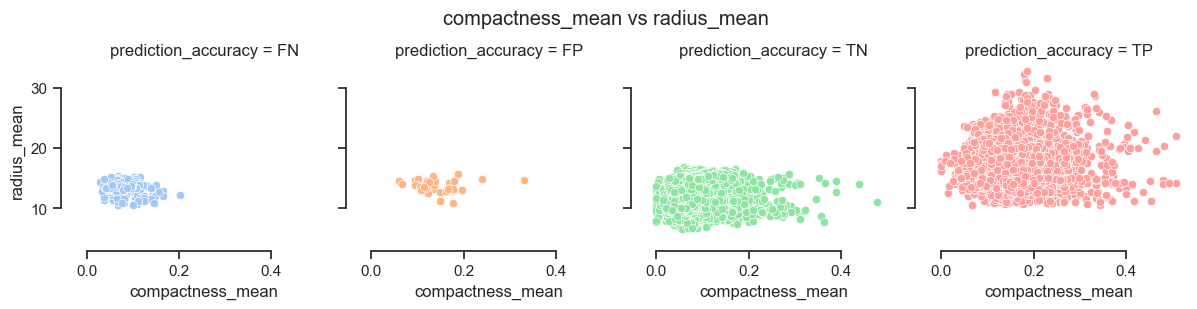

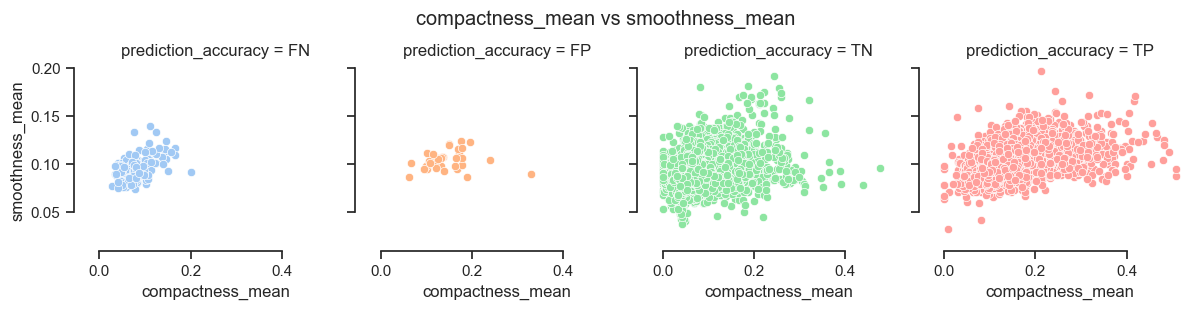

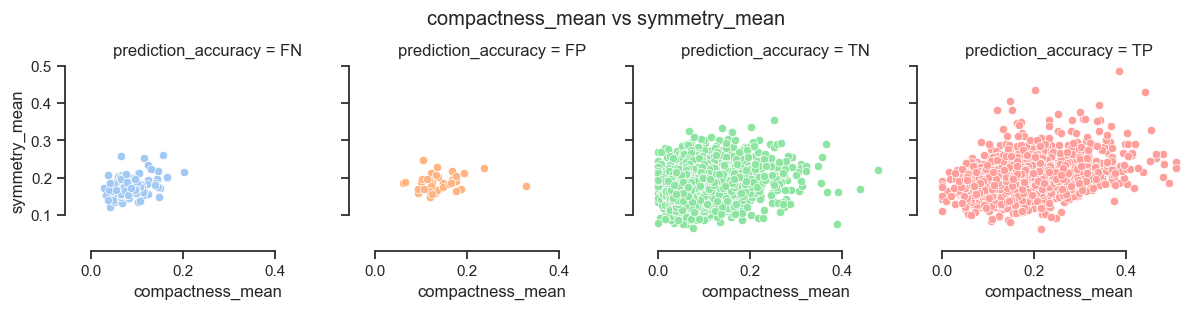

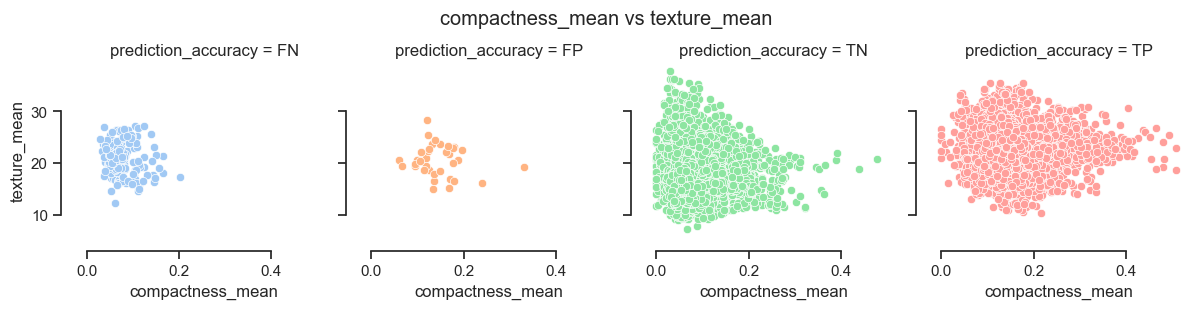

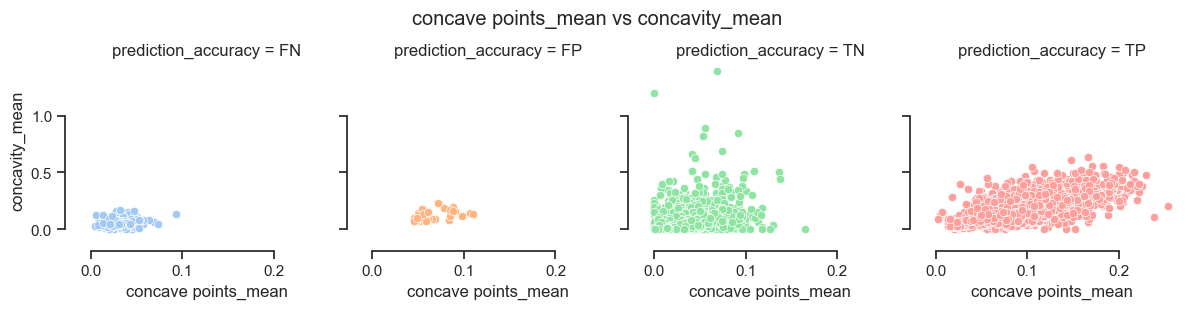

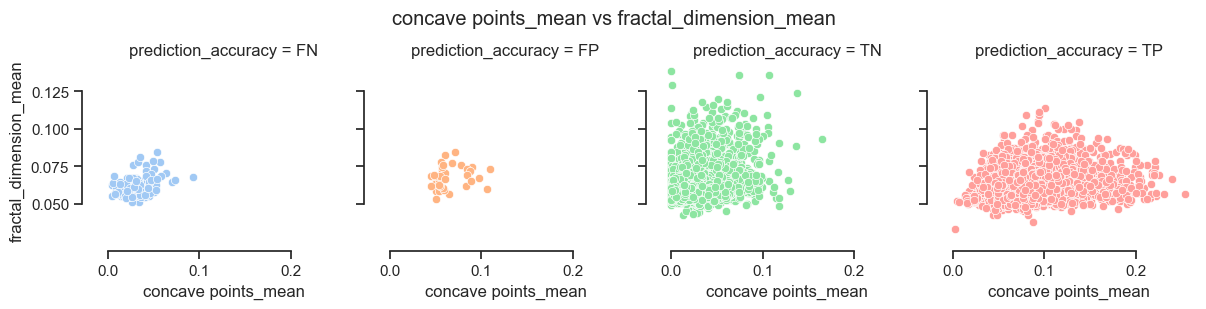

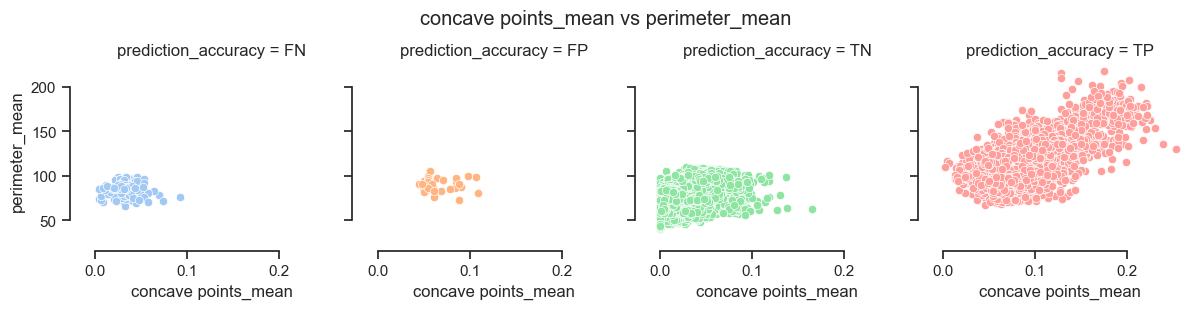

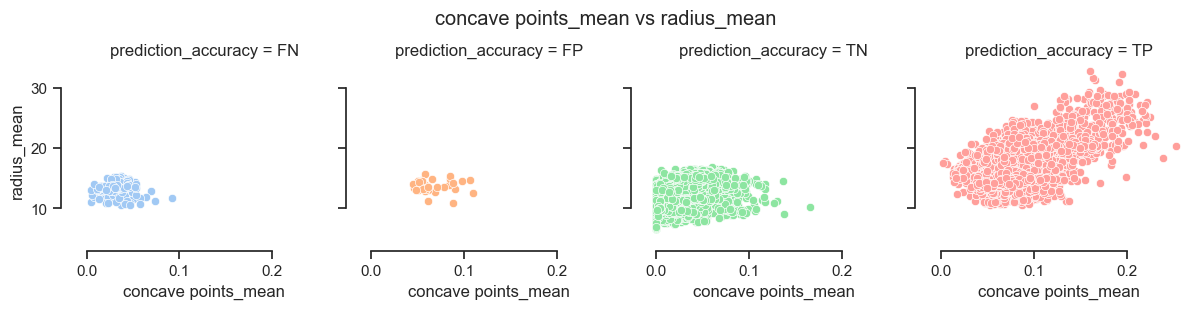

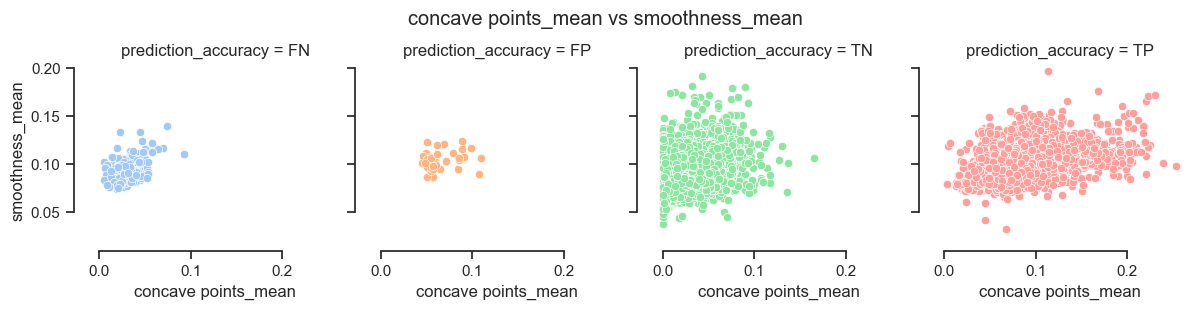

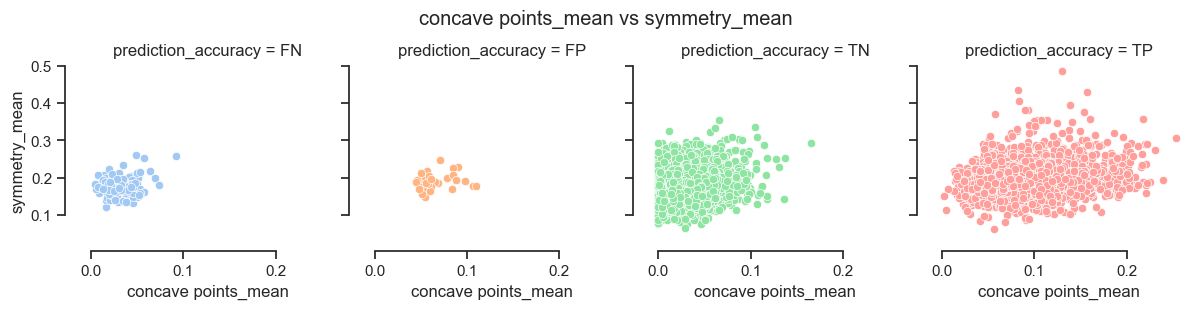

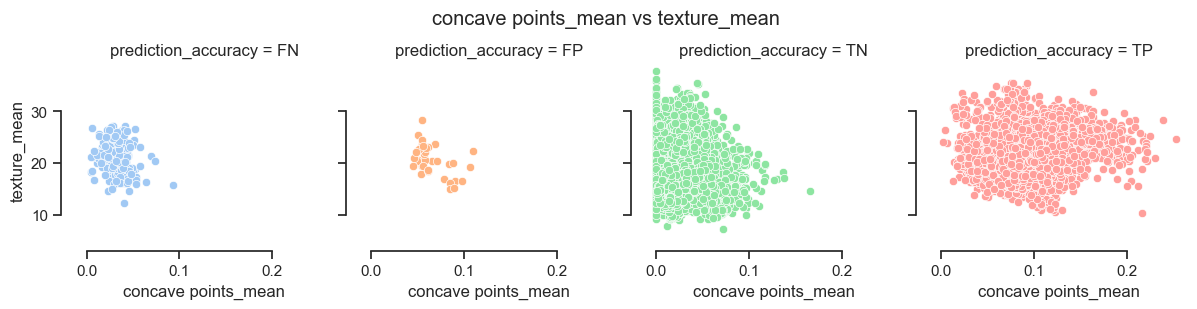

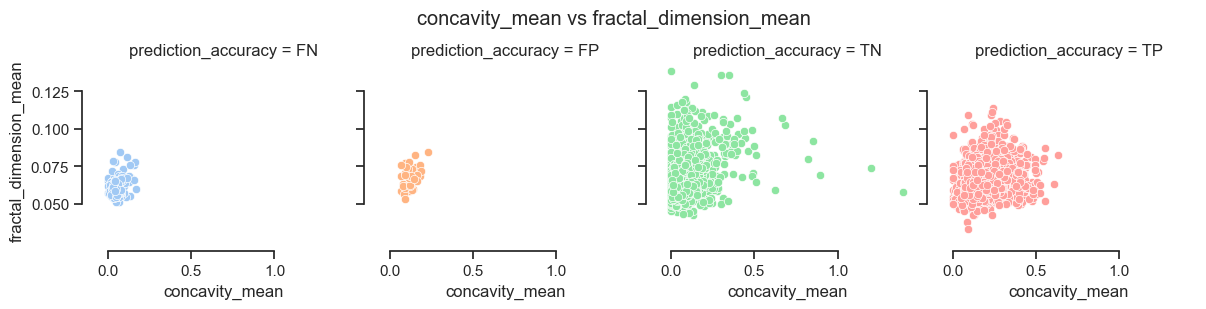

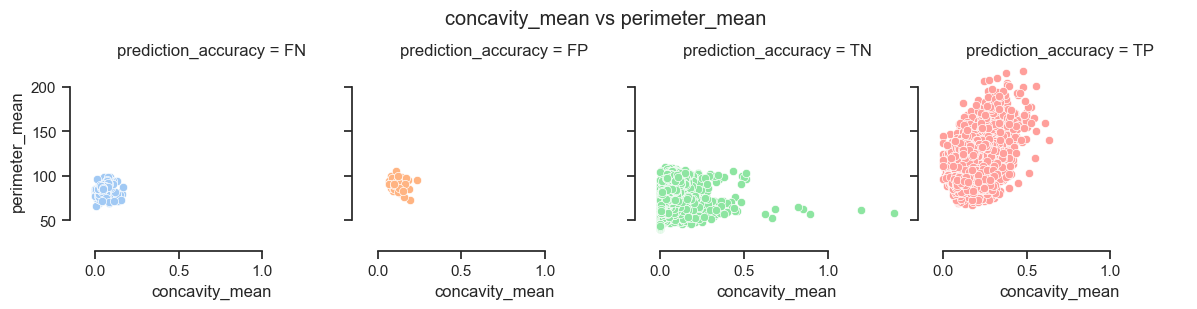

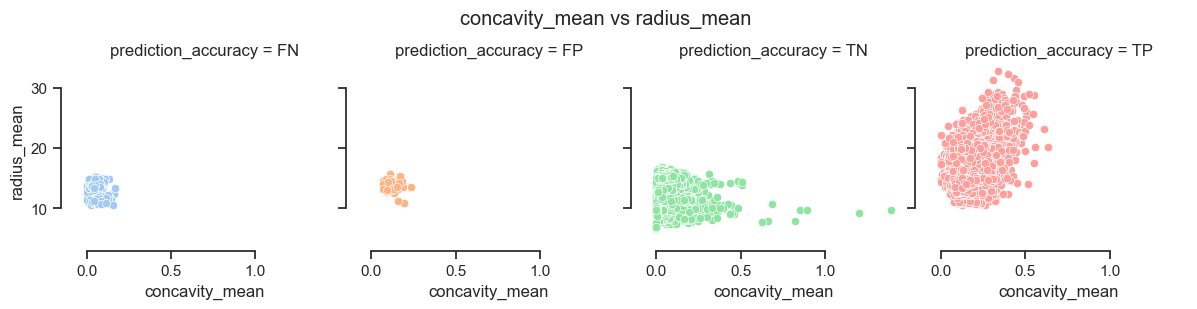

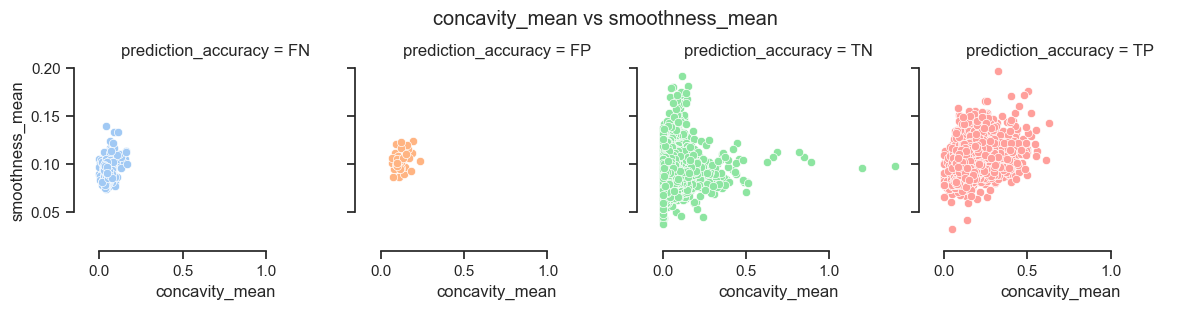

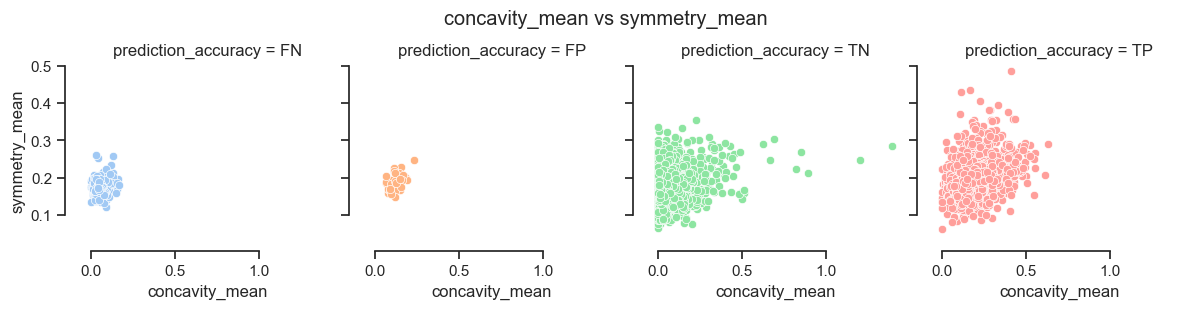

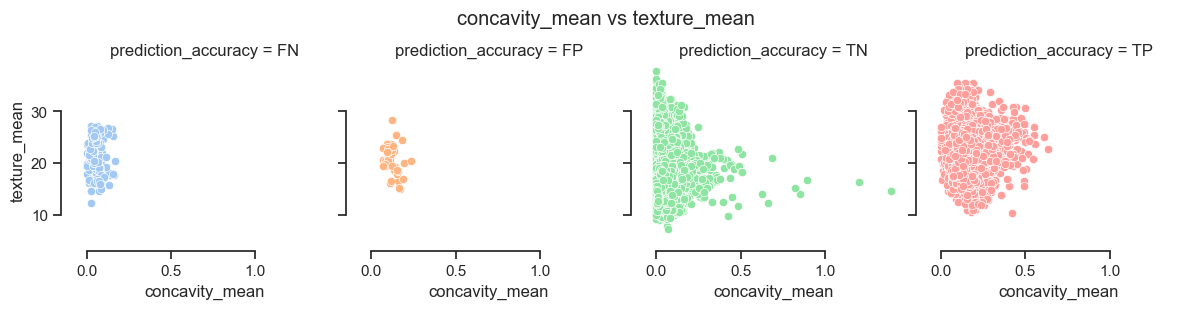

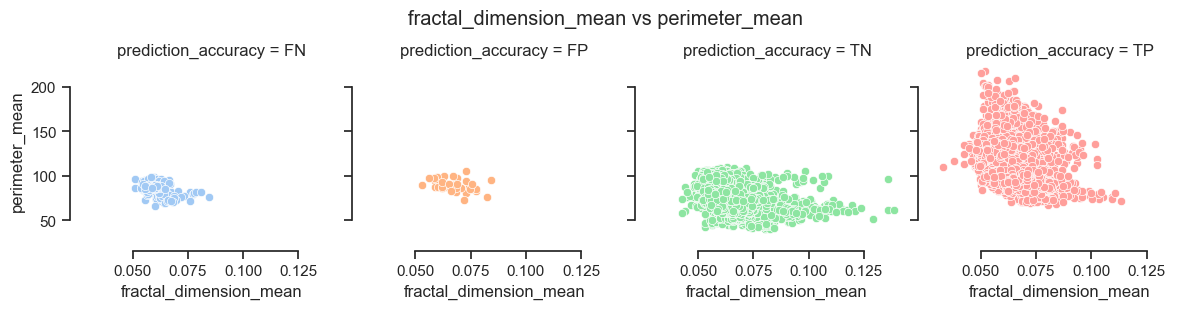

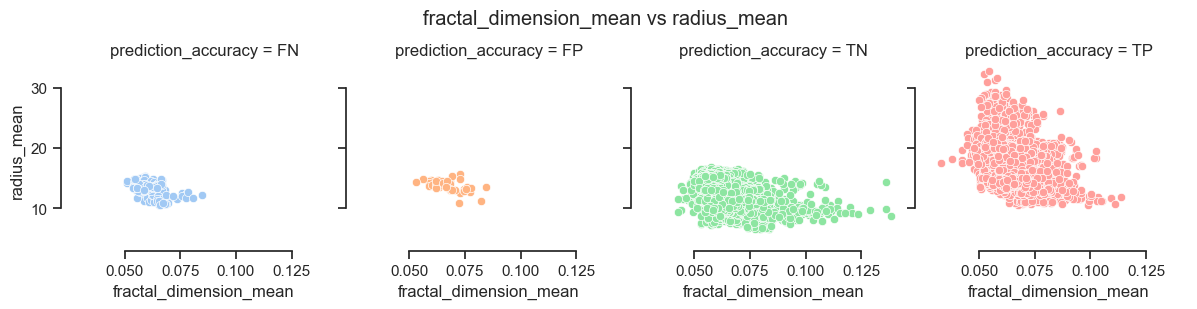

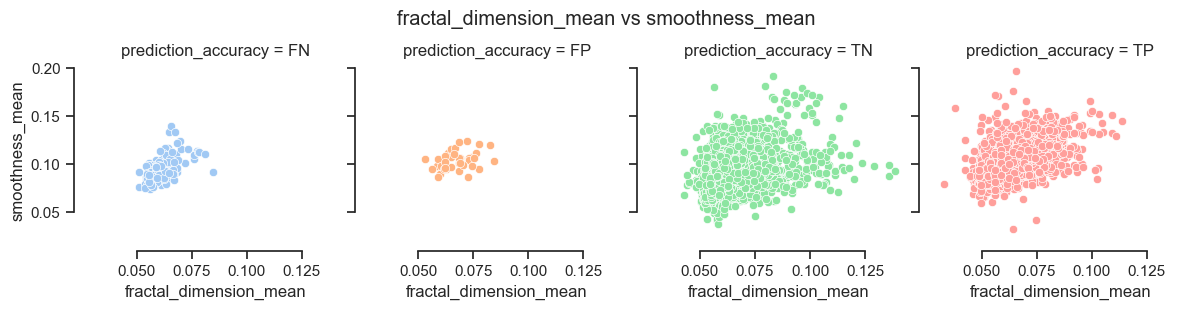

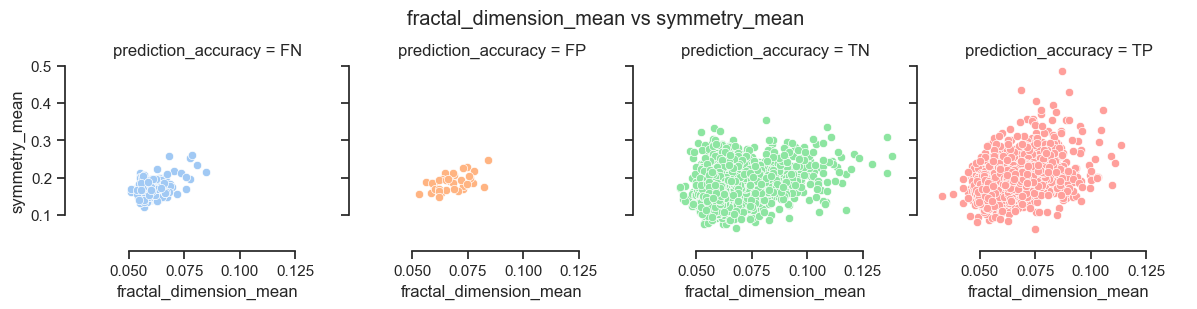

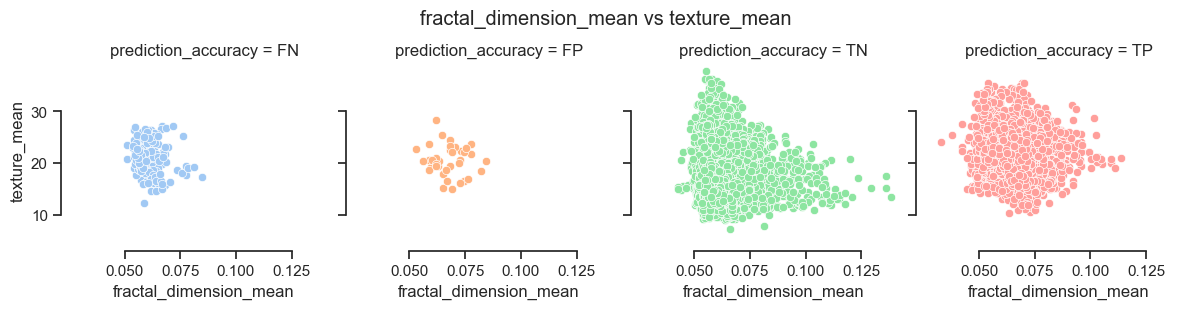

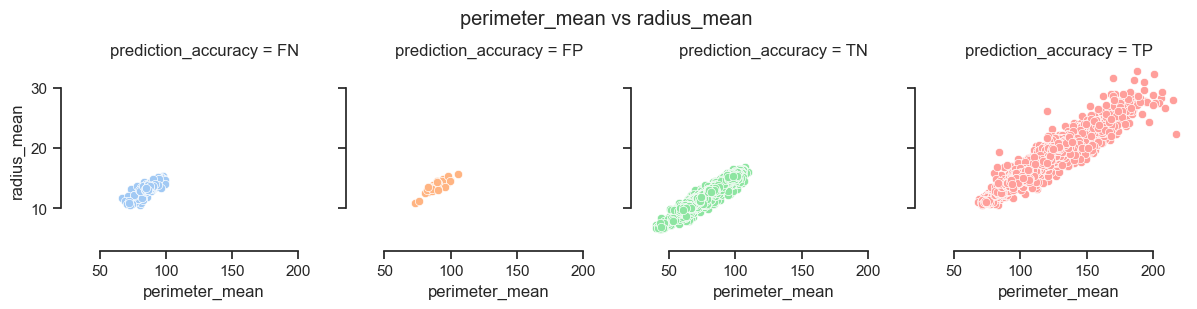

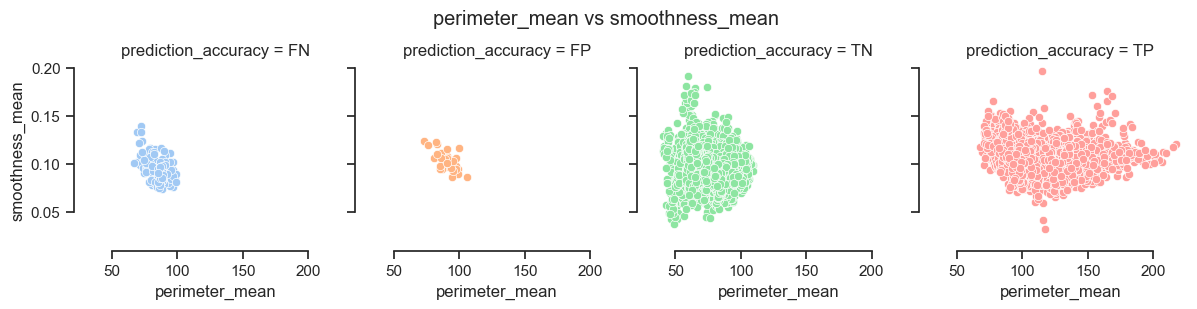

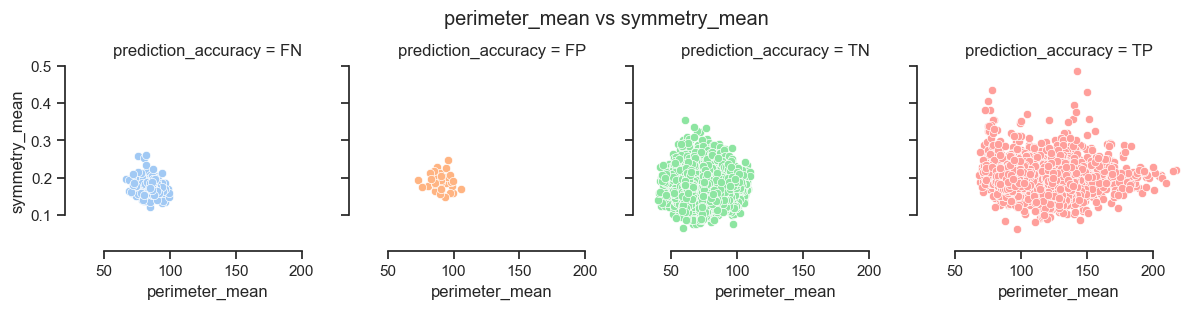

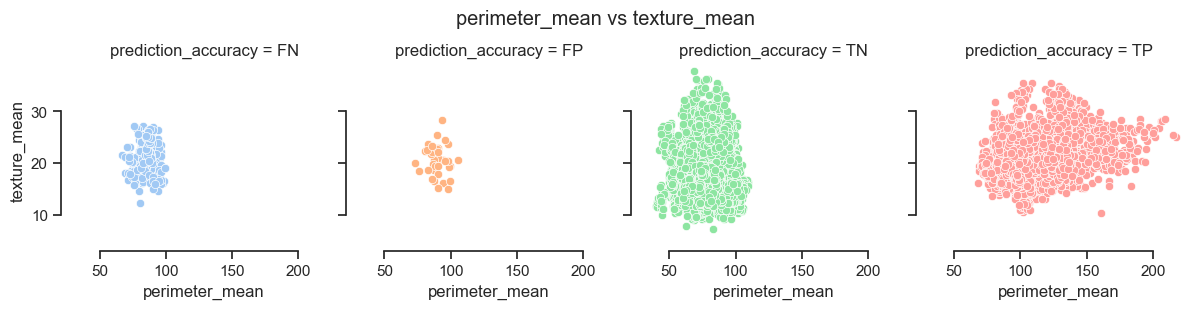

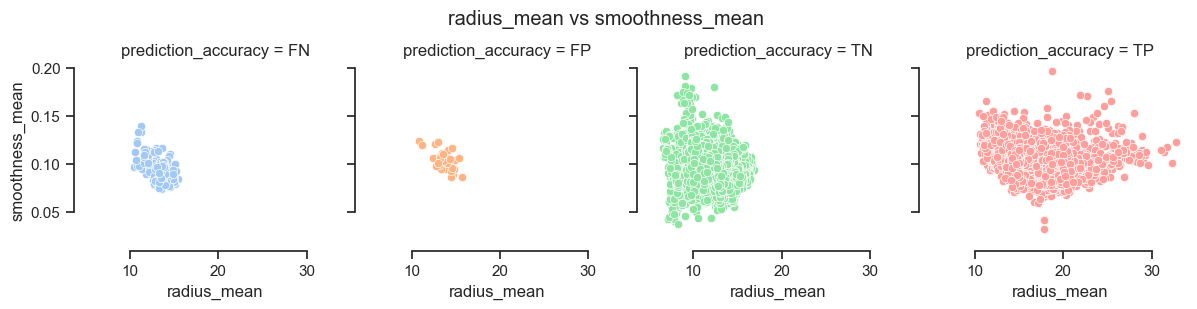

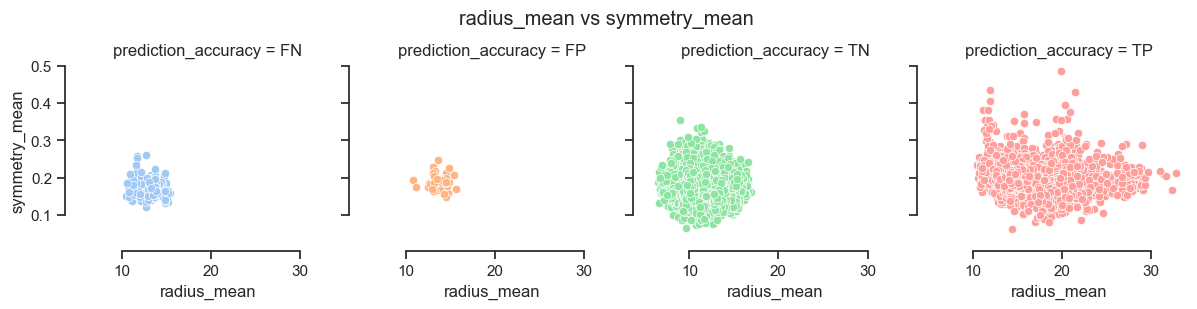

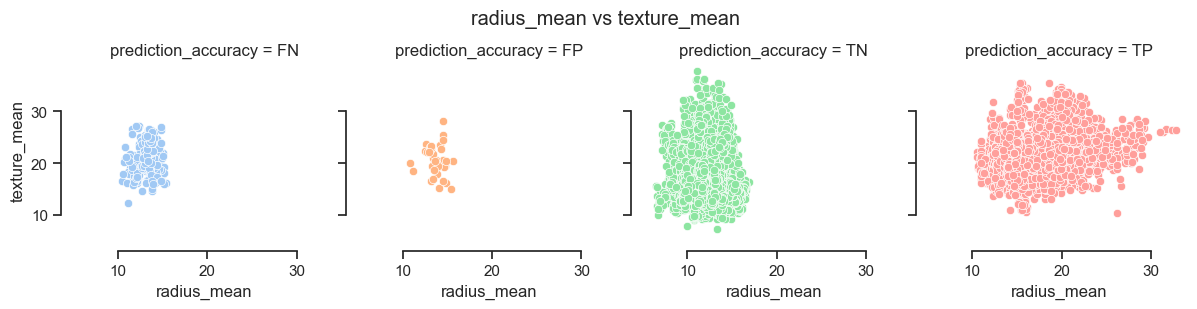

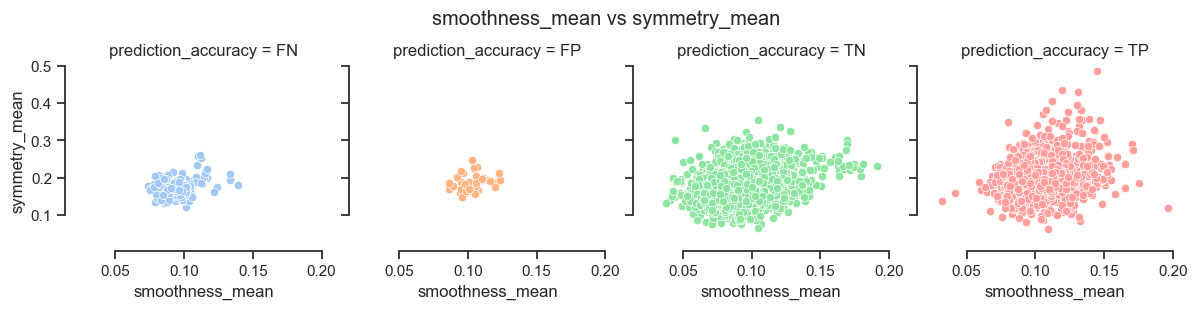

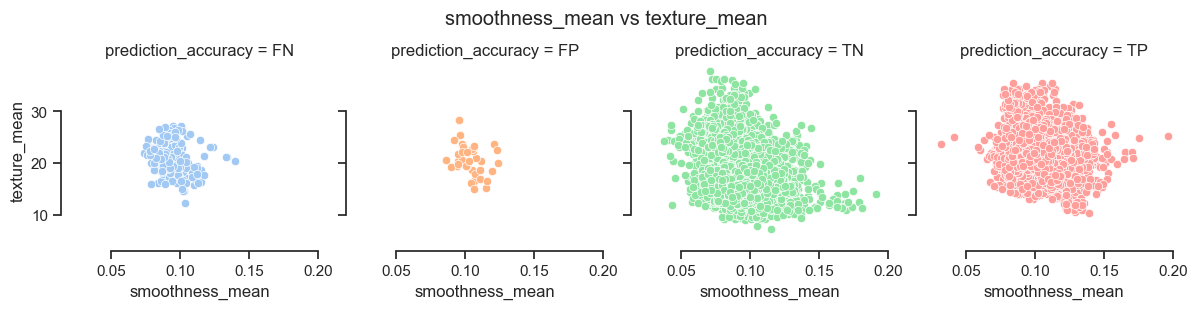

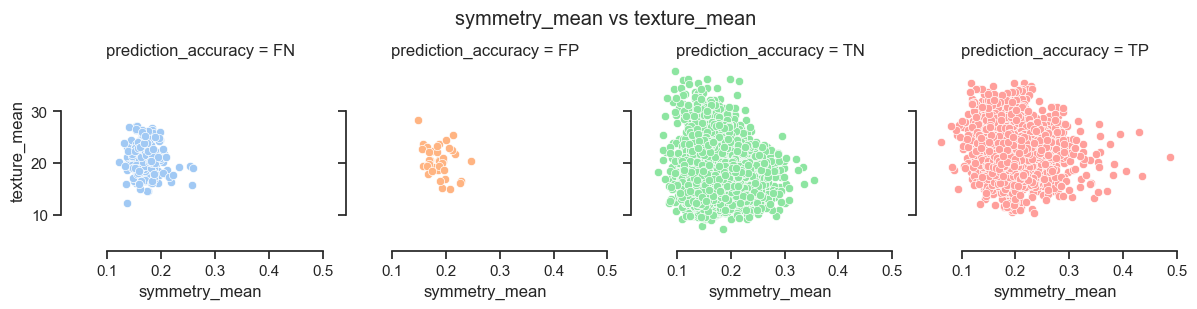

In [15]:
for i in range(len(input_columns)):
    for j in range(i+1, len(input_columns)):
        col1 = input_columns[i]
        col2 = input_columns[j]
        g = sns.FacetGrid(predictions_wide.sort_values('prediction_accuracy'), 
                          col='prediction_accuracy', hue='prediction_accuracy')
        g.map(sns.scatterplot, col1, col2)
        g.fig.subplots_adjust(top=0.8)
        g.fig.suptitle(f"{col1} vs {col2}")
        g.set_xlabels(col1)
        g.set_ylabels(col2)
        sns.despine(offset=10, trim=True)
        plt.show()

 - area vs compactness - TN (and FP to a lesser extent) have more compactness vs area
 - area vs concave points - TN (and FP to a lesser extent) have more concave points vs area, less than compactness
 - area vs concavity - TN have more concavity vs area
 - area vs fractal_dimension - TN have more fractal_dimension vs area
 - area vs smoothness - TN have more smoothness vs area
 - compactness/concavity/fractal vs perimeter/radius - TN have more compactness/concavity/fractal vs perimeter/radius
 
 - area, perimeter, and radius all super correlated

## Creating new features

In [16]:
predictions_wide['texture_mean_squared'] = predictions_wide.texture_mean**2
predictions_wide['compactness_over_area'] = predictions_wide.compactness_mean/predictions_wide.area_mean
predictions_wide['concave_points_over_area'] = predictions_wide['concave points_mean']/predictions_wide.area_mean
predictions_wide['concavity_over_area'] = predictions_wide.concavity_mean/predictions_wide.area_mean
predictions_wide['fractal_dimension_over_area'] = predictions_wide.fractal_dimension_mean/predictions_wide.area_mean
predictions_wide['smoothness_over_area'] = predictions_wide.smoothness_mean/predictions_wide.area_mean

predictions_wide['compactness_over_perimeter'] = predictions_wide.compactness_mean/predictions_wide.perimeter_mean
predictions_wide['concavity_over_perimeter'] = predictions_wide.concavity_mean/predictions_wide.perimeter_mean
predictions_wide['fractal_dimension_over_perimeter'] = predictions_wide.fractal_dimension_mean/predictions_wide.perimeter_mean
predictions_wide['compactness_over_radius'] = predictions_wide.compactness_mean/predictions_wide.radius_mean
predictions_wide['concavity_over_radius'] = predictions_wide.concavity_mean/predictions_wide.radius_mean
predictions_wide['fractal_dimension_over_radius'] = predictions_wide.fractal_dimension_mean/predictions_wide.radius_mean

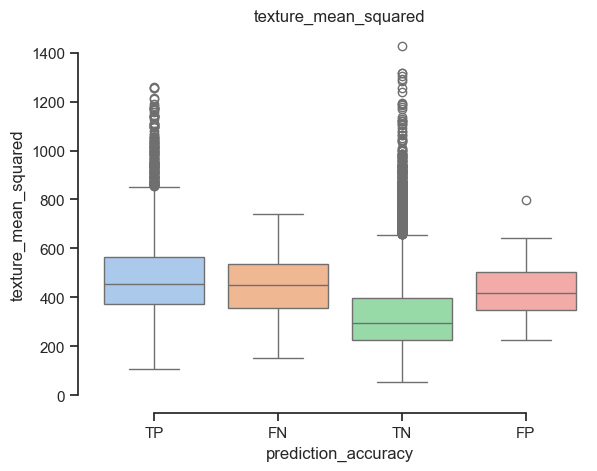

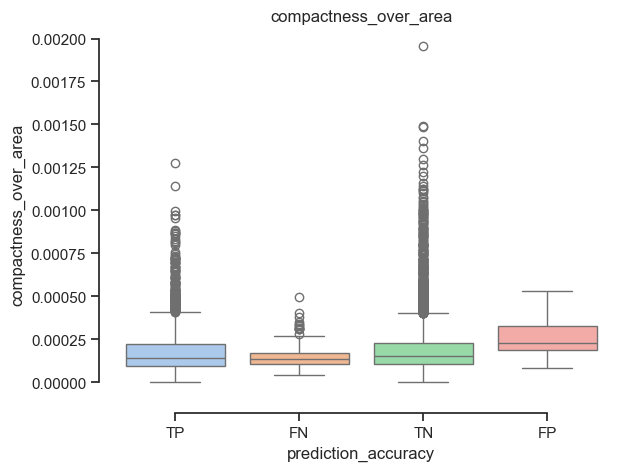

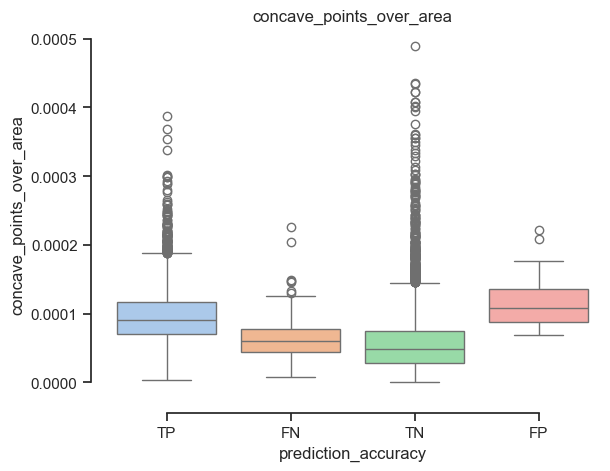

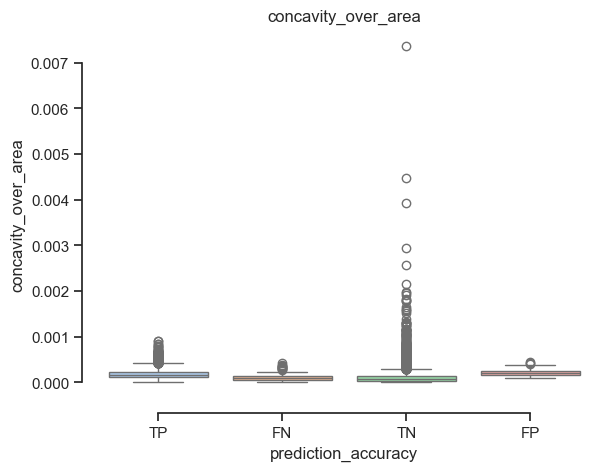

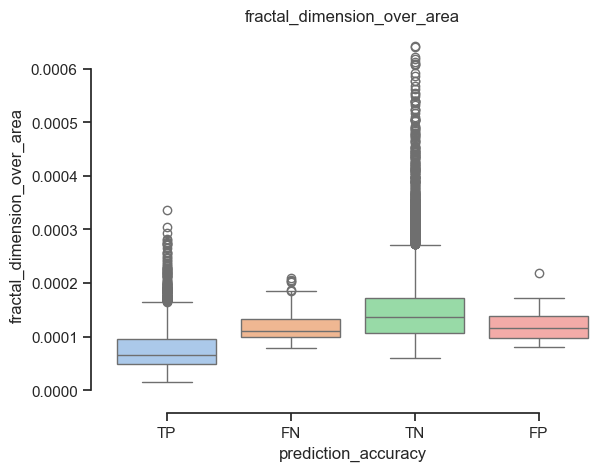

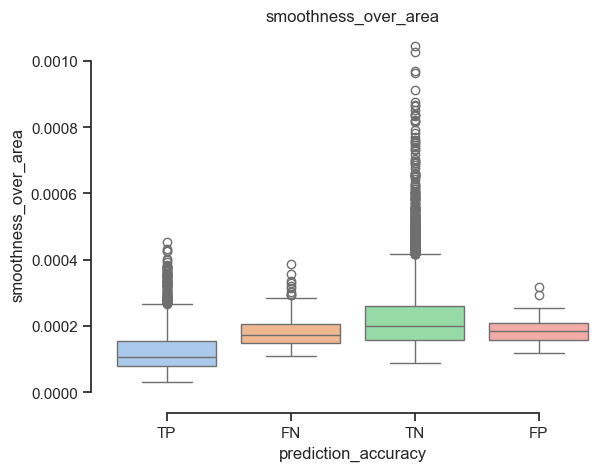

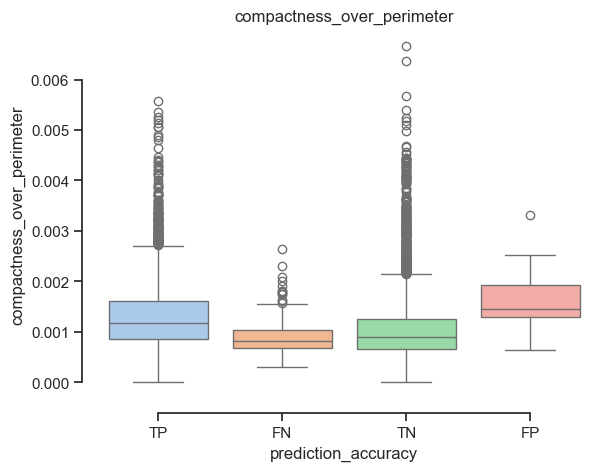

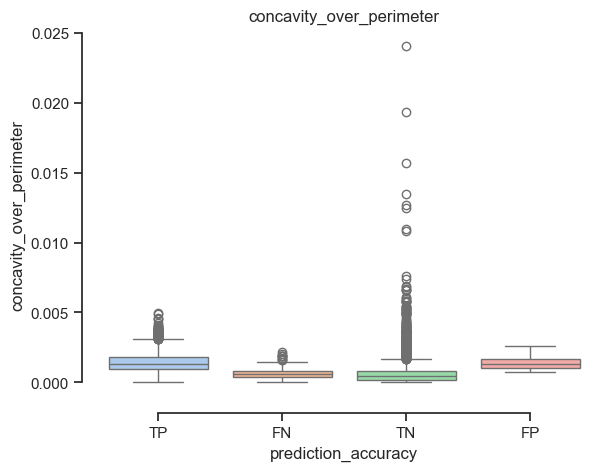

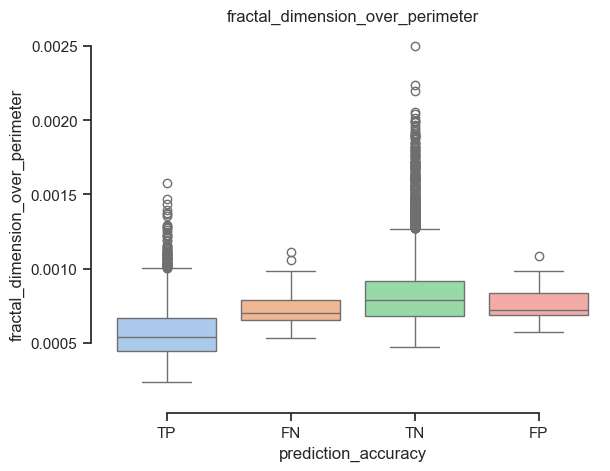

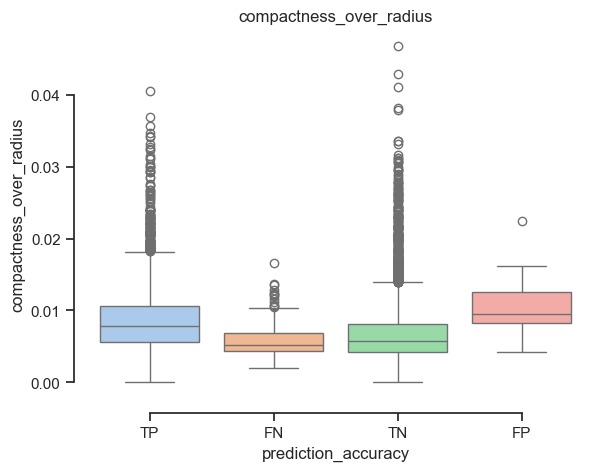

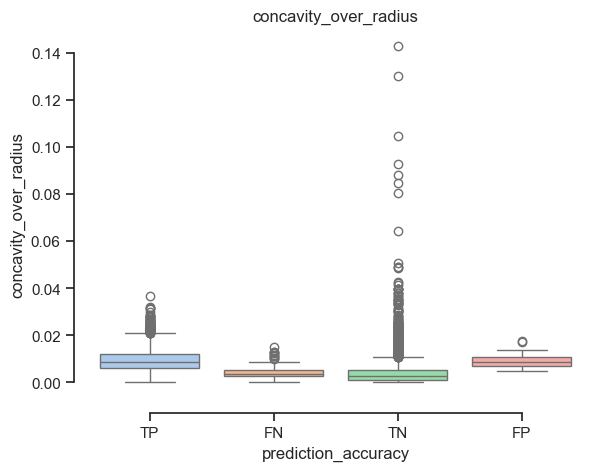

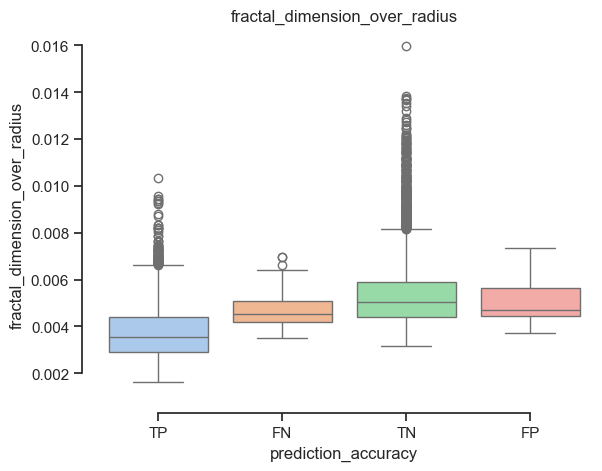

In [17]:
for new_col in predictions_wide.columns.tolist()[-12:]:
    sns.boxplot(x='prediction_accuracy', y=new_col,
                hue='prediction_accuracy', data=predictions_wide)
    sns.despine(offset=10, trim=True)
    plt.title(new_col)
    plt.show()

# Creating and testing the new model

In [18]:
new_model_cols = predictions_wide.columns.tolist()[5:]
new_model = RandomForestClassifier(random_state=55,
                                     n_estimators=50, max_depth=10, min_samples_leaf=2)
new_model.fit(predictions_wide[new_model_cols], y_train)

new_predictions = new_model.predict(predictions_wide[new_model_cols])
new_prediction_probs = new_model.predict_proba(predictions_wide[new_model_cols])

print(f'Accuracy: {accuracy_score(y_train, new_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(new_model, predictions_wide[new_model_cols], y_train, cv=5))}')

Accuracy: 0.9810990549527476
Avg CV accuracy: 0.9320991823505651


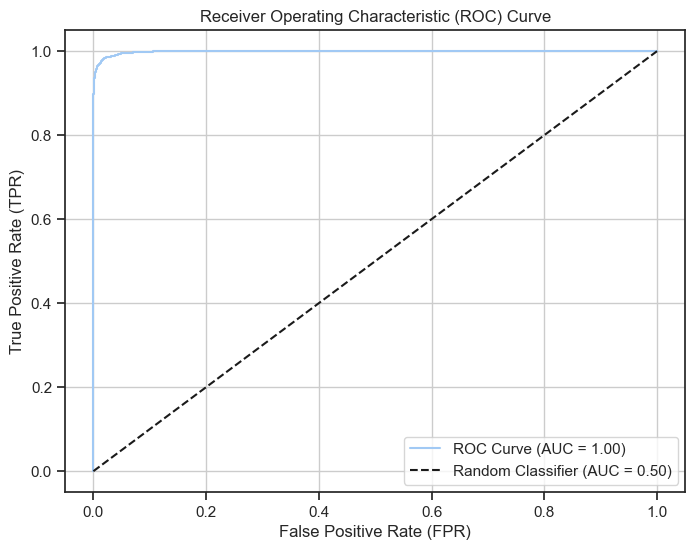

In [19]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
new_prediction_probs_binary = [x[1] for x in new_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, new_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, new_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

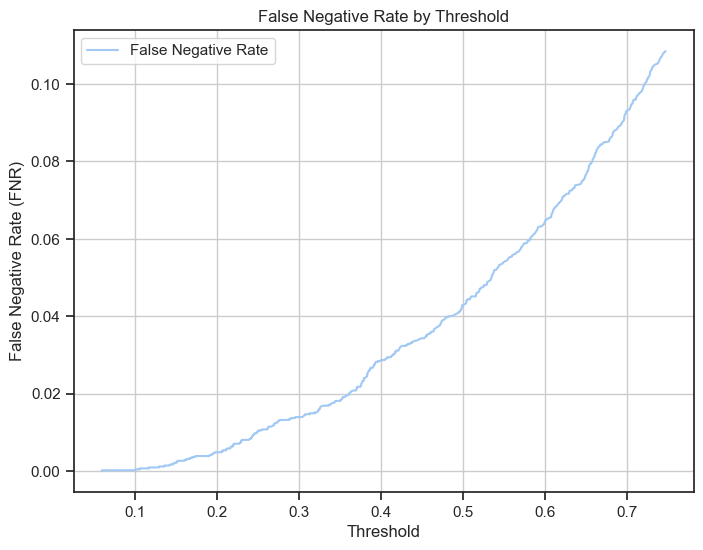

In [20]:
fpr, fnr, thresholds = det_curve(y_train_binary, new_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
new_prediction_df = pd.DataFrame({'diagnosis': y_train, 
                              'prediction' : new_predictions,
                              'M_probability': [x[1] for x in new_prediction_probs],
                              'prediction_probability': [np.max([x[0], x[1]]) for x in new_prediction_probs]})

new_prediction_df['prediction_accuracy'] = 'TP'
new_prediction_df.loc[(new_prediction_df.diagnosis == 'B') & 
                      (new_prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'TN'
new_prediction_df.loc[(new_prediction_df.diagnosis == 'B') & 
                      (new_prediction_df.prediction == 'M'), 'prediction_accuracy'] = 'FP'
new_prediction_df.loc[(new_prediction_df.diagnosis == 'M') & 
                      (new_prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'FN'

new_predictions_wide = new_prediction_df.merge(predictions_wide[new_model_cols], 
                                               left_index=True, right_index=True, how='inner')

## Graphing feature importance

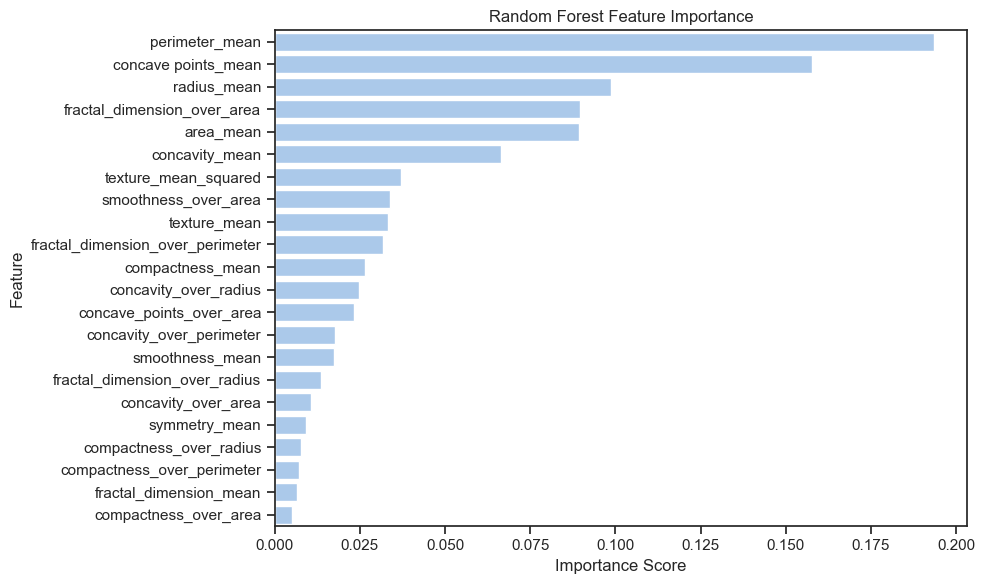

In [22]:
new_importances = new_model.feature_importances_
new_feature_importance_df = pd.DataFrame({'feature': new_model_cols, 'importance': new_importances})\
    .sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=new_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Iterating over the model until we get best results

In [23]:
iterate_model_cols = new_feature_importance_df[
#     (new_feature_importance_df.importance > 0.01) & 
#     ~(new_feature_importance_df.feature.str.contains('perimeter_')) & 
#     ~(new_feature_importance_df.feature.str.contains('radius_')) &
    ~(new_feature_importance_df.feature.isna())
].feature

iterate_model = RandomForestClassifier(random_state=55,
                                     n_estimators=50, max_depth=10, min_samples_leaf=2)
iterate_model.fit(predictions_wide[iterate_model_cols], y_train)

iterate_predictions = iterate_model.predict(predictions_wide[iterate_model_cols])
iterate_prediction_probs = iterate_model.predict_proba(predictions_wide[iterate_model_cols])

print(f'Accuracy: {accuracy_score(y_train, iterate_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(iterate_model, predictions_wide[iterate_model_cols], y_train, cv=5))}')

Accuracy: 0.9815365768288414
Avg CV accuracy: 0.9333246418595925


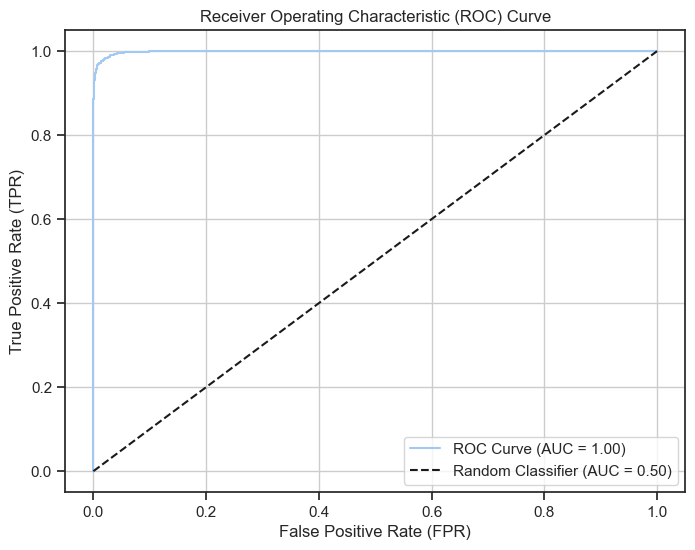

In [24]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
iterate_prediction_probs_binary = [x[1] for x in iterate_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, iterate_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, iterate_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

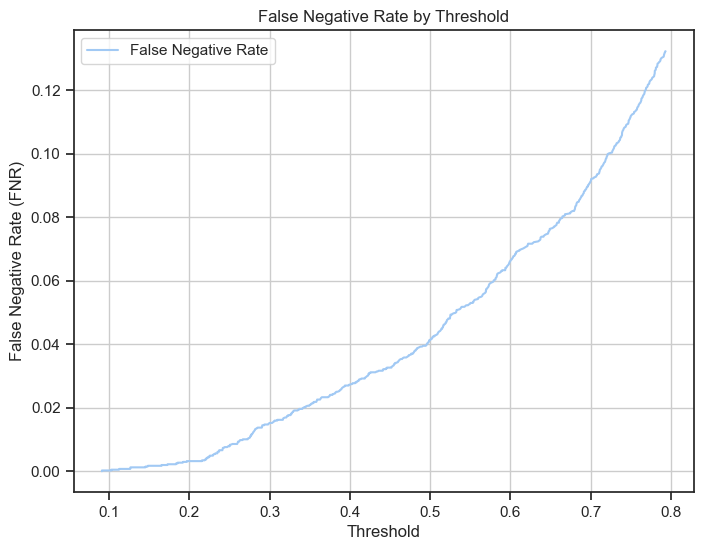

In [25]:
fpr, fnr, thresholds = det_curve(y_train_binary, iterate_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

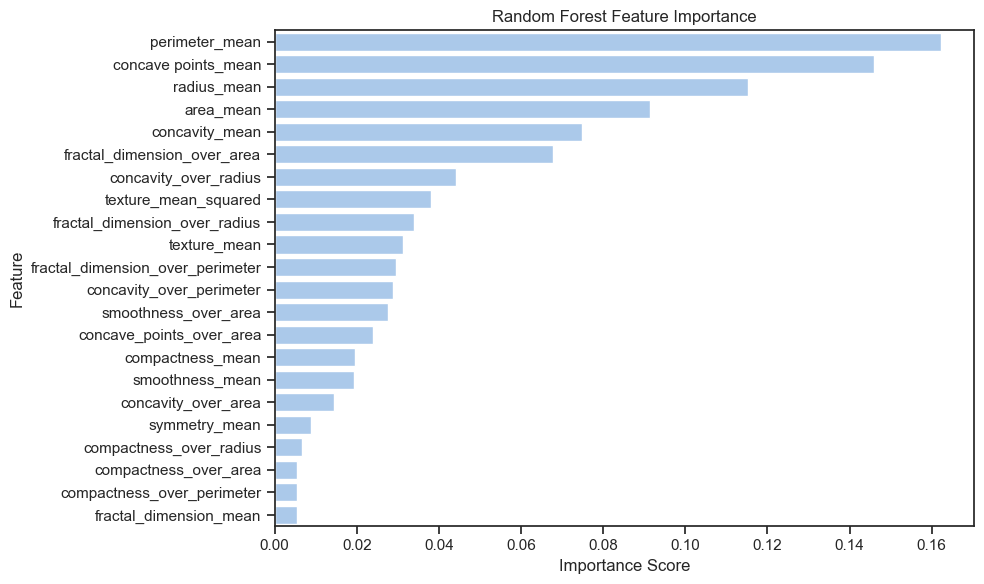

In [26]:
iterate_importances = iterate_model.feature_importances_
iterate_feature_importance_df = pd.DataFrame({'feature': iterate_model_cols, 'importance': iterate_importances})\
    .sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=iterate_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## GridsearchCV again

In [27]:
base_model = RandomForestClassifier(random_state=55)

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(predictions_wide[new_model_cols], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=55), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

In [28]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
50        4.588082      0.170699         0.035271        0.002512   
46        7.707754      0.133238         0.052544        0.002106   
58        8.544260      0.828939         0.053123        0.004535   
40        7.909485      0.075803         0.055422        0.001451   
47        9.253959      0.266017         0.063460        0.002790   
45        6.107748      0.064954         0.046285        0.002470   
68        4.266208      0.188967         0.033026        0.001803   
29        9.321576      0.548004         0.070590        0.007697   
173       8.936066      0.402261         0.066363        0.010365   
209      10.344958      0.578597         0.067481        0.017486   
137       9.077662      0.624430         0.069675        0.014616   
101       9.191722      0.360990         0.063363        0.001813   
11        9.853855      0.412671         0.068093        0.003731   
60        1.528861      0.067202         0.015171        0.001017   
191      10.040219      0.934525         0.082530        0.024316   
155       9.778136      0.525057         0.064589        0.003420   
119       9.809879      0.344566         0.067931        0.003578   
41        9.223284      0.179448         0.064316        0.003081   
71        8.943240      0.509106         0.064127        0.008418   
118       8.339423      0.352534         0.057451        0.003213   
51        6.099192      0.091711         0.045374        0.002712   
10       10.071867      1.373182         0.056528        0.001860   
154       8.081765      0.554666         0.055221        0.002932   
190       7.970991      0.384396         0.060603        0.007323   
69        5.638221      0.150488         0.042023        0.003201   
53       10.092767      0.670764         0.069293        0.008874   
49        3.036487      0.118786         0.024992        0.001116   
48        1.536926      0.050161         0.015195        0.001583   
83        9.805431      0.404501         0.067850        0.005618   
79        4.302354      0.699444         0.026684        0.001074   
57        6.412121      0.784528         0.045181        0.002323   
70        7.176795      0.216512         0.051129        0.003506   
59        8.963586      0.280634         0.062302        0.004982   
82        8.308490      0.239216         0.058974        0.004439   
8         5.340731      0.535574         0.057950        0.032836   
152       4.744636      0.220014         0.034687        0.001429   
188       4.762396      0.246889         0.034886        0.001866   
116       5.493393      0.260216         0.041030        0.007997   
117       6.497330      0.258737         0.046900        0.002008   
9         9.646576      1.337472         0.078881        0.033600   
153       6.432479      0.351640         0.051432        0.007167   
189       6.291683      0.123314         0.044856        0.003186   
87        6.803625      0.201247         0.049048        0.003783   
26        4.565261      0.151369         0.036923        0.003630   
98        4.581595      0.212369         0.037340        0.003196   
134       4.505798      0.133006         0.034250        0.002000   
206       6.401161      0.810118         0.044770        0.008393   
170       4.404598      0.181363         0.034153        0.001516   
65        8.795727      0.222657         0.062630        0.006554   
67        2.933006      0.173038         0.023940        0.001754   
56        4.791073      0.229386         0.041226        0.005925   
54        1.569731      0.126582         0.016086        0.001811   
52        8.156139      0.342098         0.062595        0.010671   
80        5.219125      0.315651         0.037682        0.002488   
39        6.241598      0.270924         0.042376        0.001285   
28        7.754720      0.398968         0.053308        0.001428   
172       7.402138      0.271585         0.054605        0.001380   
208

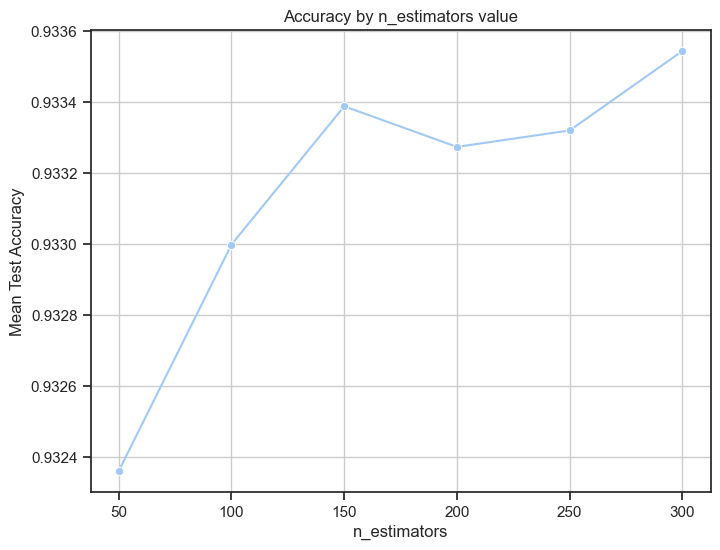

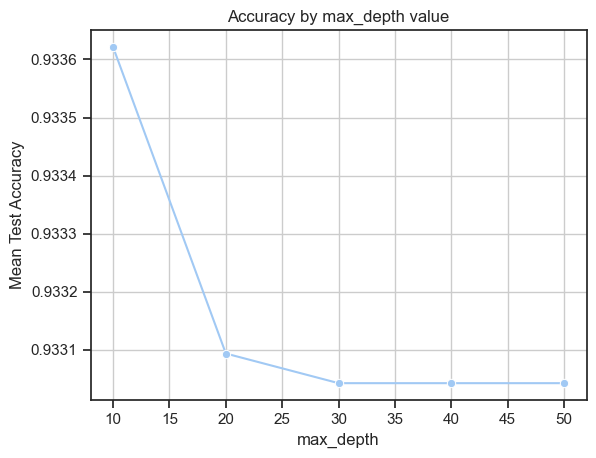

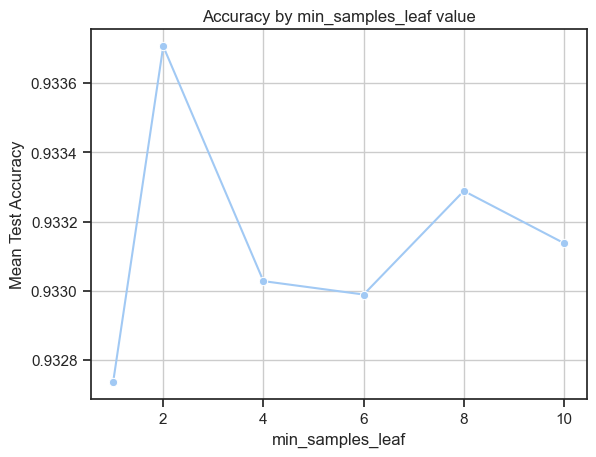

In [29]:
plt.figure(figsize=(8, 6))

for param in param_grid.keys():
    sns.lineplot(data=results.groupby('param_' + param, as_index=False).agg({'mean_test_score':'mean'}), 
                 x='param_' + param, y='mean_test_score', marker='o')
    plt.title('Accuracy by ' + param + ' value')
    plt.xlabel(param)
    plt.ylabel('Mean Test Accuracy')
    plt.grid(True)
    plt.show()

## GridsearchCV yet again, with different values

In [30]:
base_model = RandomForestClassifier(random_state=55)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 30, 50, 70, 90],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(predictions_wide[new_model_cols], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=55), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50, 70, 90],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [31]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9       14.648883      0.164803         0.096189        0.005237   
8       11.763740      0.332965         0.079440        0.002242   
14      16.689764      1.011017         0.156817        0.042826   
13      12.546502      0.617902         0.093070        0.013943   
7        8.923748      0.139539         0.061204        0.003191   
18      13.782403      0.145284         0.124359        0.030802   
6        5.831784      0.098113         0.041766        0.001981   
19      19.438661      0.848845         0.154694        0.056415   
27      12.254181      0.359042         0.127200        0.048853   
87       9.292742      0.252623         0.062001        0.002741   
67      10.818901      0.448655         0.081599        0.006179   
47      10.891658      0.392299         0.076914        0.006465   
53      14.830595      0.676532         0.104652        0.013052   
33      15.616523      0.829124         0.098872        0.011648   
93      11.970199      0.294817         0.083398        0.008280   
73      14.021689      0.689654         0.102692        0.007588   
2        8.842080      0.232456         0.059855        0.000353   
11       5.856202      0.153738         0.043663        0.003504   
12       8.912623      0.365398         0.062900        0.003916   
10       2.892418      0.062043         0.023724        0.001497   
16       6.950677      0.591050         0.052252        0.006719   
17       9.980878      0.488400         0.084144        0.013412   
48      14.762259      0.498772         0.094185        0.004343   
68      14.536179      0.497272         0.099451        0.011593   
28      16.338358      0.815615         0.101580        0.014363   
88      12.502233      0.450012         0.081836        0.003252   
38      15.254618      0.881898         0.099217        0.013631   
98      11.679560      0.272490         0.080466        0.002663   
78      13.351454      0.663086         0.115025        0.051417   
58      14.709077      0.439263         0.138708        0.047899   
86       6.223603      0.158394         0.043561        0.002152   
66       7.224996      0.364925         0.053530        0.007183   
46       7.436223      0.253835         0.057148        0.007899   
26       7.808757      0.988298         0.076294        0.024565   
34      19.814240      0.833103         0.139147        0.028531   
54      17.717216      0.511085         0.129591        0.021921   
74      17.802280      0.530206         0.135357        0.023689   
94      14.905037      0.315163         0.100232        0.004697   
3       11.737022      0.180979         0.077704        0.002832   
44      19.120932      0.162616         0.135032        0.015801   
64      18.574051      0.313862         0.143784        0.013903   
84      15.860608      0.315046         0.102965        0.004979   
24      19.649868      0.689706         0.124974        0.009248   
89      15.740943      0.362825         0.110453        0.015478   
49      18.202838      0.678965         0.128889        0.015202   
69      18.402925      0.574691         0.126287        0.015759   
29      19.073668      1.374760         0.135788        0.020000   
1        5.931936      0.105488         0.041353        0.001398   
25       3.909468      0.349045         0.030703        0.003678   
45       3.539591      0.077274         0.030839        0.001901   
85       3.097877      0.076278         0.024252        0.000774   
65       3.672533      0.324555         0.031130        0.003822   
71       6.977524      0.211975         0.054186        0.007644   
91       6.100258      0.125903         0.043181        0.001443   
31       7.200623      0.495170         0.050741        0.001968   
4       14.737538      0.247024         0.098780        0.004826   
51       7.562712      0.128519         0.052174        0.007546   
79      17.005340      0.968808         0.102565        0.00

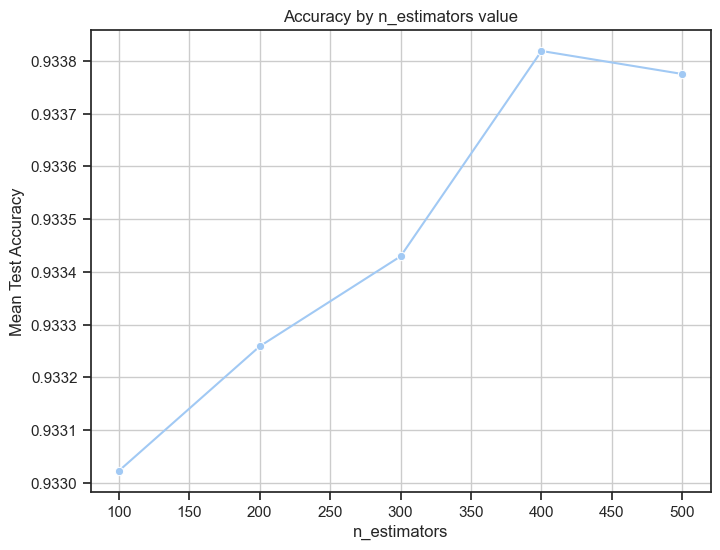

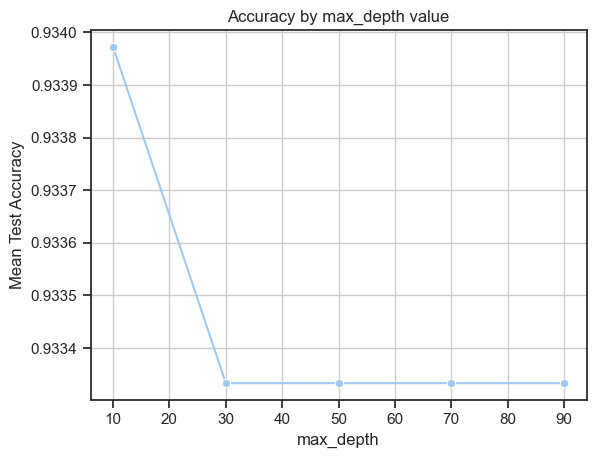

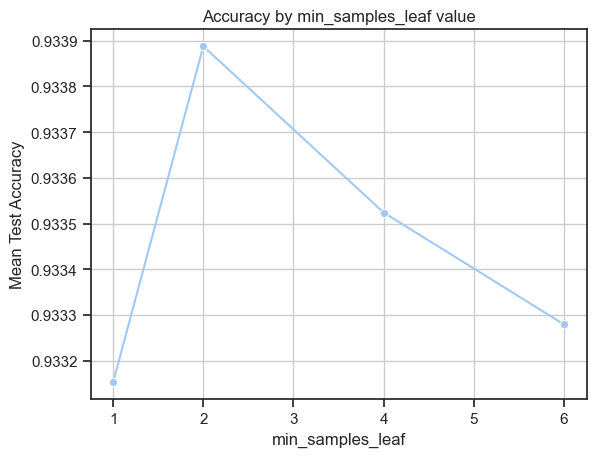

In [32]:
plt.figure(figsize=(8, 6))

for param in param_grid.keys():
    sns.lineplot(data=results.groupby('param_' + param, as_index=False).agg({'mean_test_score':'mean'}), 
                 x='param_' + param, y='mean_test_score', marker='o')
    plt.title('Accuracy by ' + param + ' value')
    plt.xlabel(param)
    plt.ylabel('Mean Test Accuracy')
    plt.grid(True)
    plt.show()

# Settling on the final model and testing

In [33]:
final_model_cols = new_feature_importance_df.feature

X_test['texture_mean_squared'] = X_test.texture_mean**2
X_test['compactness_over_area'] = X_test.compactness_mean/X_test.area_mean
X_test['concave_points_over_area'] = X_test['concave points_mean']/X_test.area_mean
X_test['concavity_over_area'] = X_test.concavity_mean/X_test.area_mean
X_test['fractal_dimension_over_area'] = X_test.fractal_dimension_mean/X_test.area_mean
X_test['smoothness_over_area'] = X_test.smoothness_mean/X_test.area_mean

X_test['compactness_over_perimeter'] = X_test.compactness_mean/X_test.perimeter_mean
X_test['concavity_over_perimeter'] = X_test.concavity_mean/X_test.perimeter_mean
X_test['fractal_dimension_over_perimeter'] = X_test.fractal_dimension_mean/X_test.perimeter_mean
X_test['compactness_over_radius'] = X_test.compactness_mean/X_test.radius_mean
X_test['concavity_over_radius'] = X_test.concavity_mean/X_test.radius_mean
X_test['fractal_dimension_over_radius'] = X_test.fractal_dimension_mean/X_test.radius_mean

final_model = RandomForestClassifier(random_state=55,
                                     n_estimators=50, max_depth=10, min_samples_leaf=2)
final_model.fit(predictions_wide[final_model_cols], y_train)

final_predictions = final_model.predict(predictions_wide[final_model_cols])
final_prediction_probs = final_model.predict_proba(predictions_wide[final_model_cols])

print(f'Accuracy: {accuracy_score(y_train, final_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(final_model, predictions_wide[final_model_cols], y_train, cv=5))}')

Accuracy: 0.9815365768288414
Avg CV accuracy: 0.9333246418595925


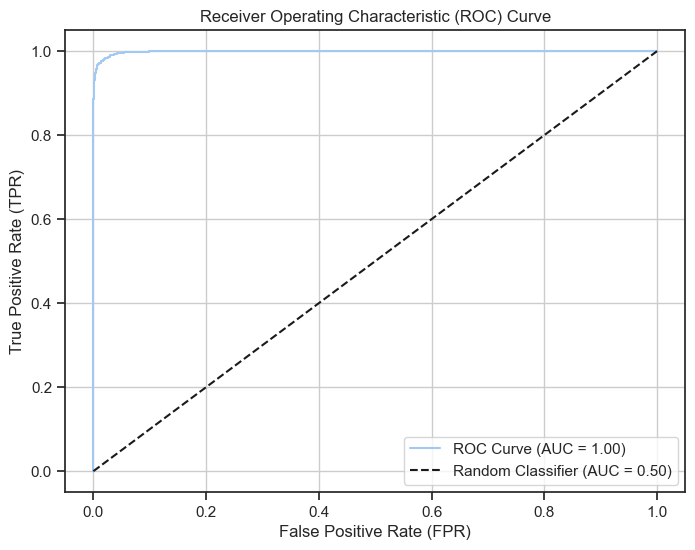

In [34]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
final_prediction_probs_binary = [x[1] for x in final_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, final_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, final_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

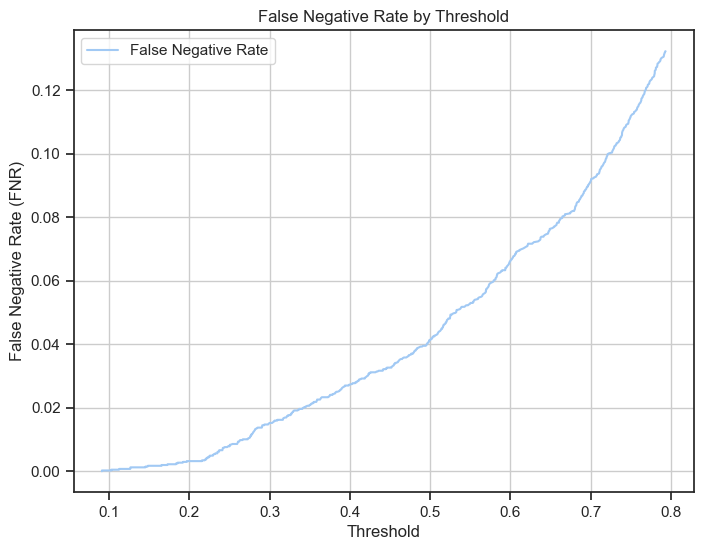

In [35]:
fpr, fnr, thresholds = det_curve(y_train_binary, final_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

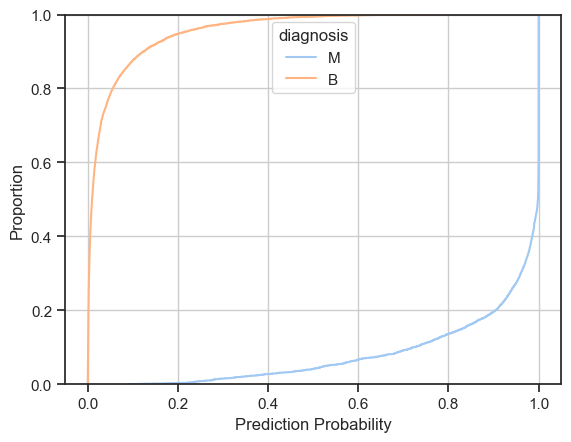

In [36]:
final_prediction_df = pd.DataFrame({'diagnosis': y_train, 
                                    'prediction' : final_predictions,
                                    'M_probability': [x[1] for x in final_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in final_prediction_probs]})

sns.ecdfplot(data=final_prediction_df,
             x='M_probability', hue='diagnosis')
plt.xlabel('Prediction Probability')
plt.grid(True)
plt.show()

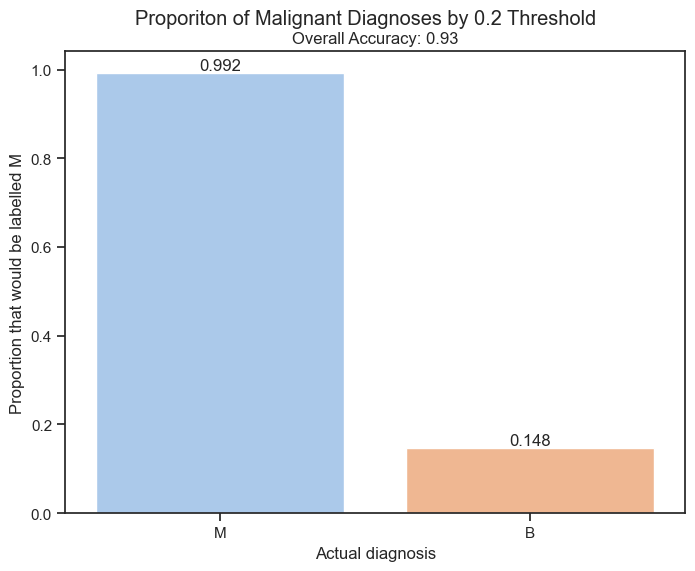

In [37]:
final_test_predictions = final_model.predict(X_test[final_model_cols])
final_test_prediction_probs = final_model.predict_proba(X_test[final_model_cols])

final_test_prediction_df = pd.DataFrame({'diagnosis': y_test, 
                                    'prediction' : final_test_predictions,
                                    'M_probability': [x[1] for x in final_test_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in final_test_prediction_probs],
                                    'is_above_20_percent': [x[1] > 0.2 for x in final_test_prediction_probs]})

fig, ax = plt.subplots(figsize=(8, 6))
bars = sns.barplot(data=final_test_prediction_df, x='diagnosis', 
                   y='is_above_20_percent', hue='diagnosis', ax=ax, errorbar=None)
ax.bar_label(bars.containers[0], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
ax.bar_label(bars.containers[1], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
plt.xlabel('Actual diagnosis')
plt.ylabel('Proportion that would be labelled M')
plt.suptitle('Proporiton of Malignant Diagnoses by 0.2 Threshold', y=0.95)
plt.title(f'Overall Accuracy: \
{round(accuracy_score(y_test, final_test_predictions, normalize=True, sample_weight=None), 2)}')
plt.show()

# Recreating these results with the original dataset

In [38]:
cancer_dataset = pd.read_csv('Breast_cancer_dataset.csv')\
    .drop('Unnamed: 32', axis=1)
cancer_dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

In [39]:
cancer_dataset['texture_mean_squared'] = cancer_dataset.texture_mean**2
cancer_dataset['compactness_over_area'] = cancer_dataset.compactness_mean/cancer_dataset.area_mean
cancer_dataset['concave_points_over_area'] = cancer_dataset['concave points_mean']/cancer_dataset.area_mean
cancer_dataset['concavity_over_area'] = cancer_dataset.concavity_mean/cancer_dataset.area_mean
cancer_dataset['fractal_dimension_over_area'] = cancer_dataset.fractal_dimension_mean/cancer_dataset.area_mean
cancer_dataset['smoothness_over_area'] = cancer_dataset.smoothness_mean/cancer_dataset.area_mean

cancer_dataset['compactness_over_perimeter'] = cancer_dataset.compactness_mean/cancer_dataset.perimeter_mean
cancer_dataset['concavity_over_perimeter'] = cancer_dataset.concavity_mean/cancer_dataset.perimeter_mean
cancer_dataset['fractal_dimension_over_perimeter'] = cancer_dataset.fractal_dimension_mean/cancer_dataset.perimeter_mean
cancer_dataset['compactness_over_radius'] = cancer_dataset.compactness_mean/cancer_dataset.radius_mean
cancer_dataset['concavity_over_radius'] = cancer_dataset.concavity_mean/cancer_dataset.radius_mean
cancer_dataset['fractal_dimension_over_radius'] = cancer_dataset.fractal_dimension_mean/cancer_dataset.radius_mean

cancer_dataset['texture_worst_squared'] = cancer_dataset.texture_worst**2
cancer_dataset['compactness_over_area_worst'] = cancer_dataset.compactness_worst/cancer_dataset.area_worst
cancer_dataset['concave_points_over_area_worst'] = cancer_dataset['concave points_worst']/cancer_dataset.area_worst
cancer_dataset['concavity_over_area_worst'] = cancer_dataset.concavity_worst/cancer_dataset.area_worst
cancer_dataset['fractal_dimension_over_area_worst'] = cancer_dataset.fractal_dimension_worst/cancer_dataset.area_worst
cancer_dataset['smoothness_over_area_worst'] = cancer_dataset.smoothness_worst/cancer_dataset.area_worst

cancer_dataset['compactness_over_perimeter_worst'] = cancer_dataset.compactness_worst/cancer_dataset.perimeter_worst
cancer_dataset['concavity_over_perimeter_worst'] = cancer_dataset.concavity_worst/cancer_dataset.perimeter_worst
cancer_dataset['fractal_dimension_over_perimeter_worst'] = cancer_dataset.fractal_dimension_worst/cancer_dataset.perimeter_worst
cancer_dataset['compactness_over_radius_worst'] = cancer_dataset.compactness_worst/cancer_dataset.radius_worst
cancer_dataset['concavity_over_radius_worst'] = cancer_dataset.concavity_worst/cancer_dataset.radius_worst
cancer_dataset['fractal_dimension_over_radius_worst'] = cancer_dataset.fractal_dimension_worst/cancer_dataset.radius_worst

expanded_model_cols = [colname for colname in cancer_dataset.columns.tolist()[2:] 
    if colname not in ['texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se']]
original_X_train = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'train'].id.values)][expanded_model_cols]
original_X_test = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'test'].id.values)][expanded_model_cols]
original_y_train = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'train'].id.values)]['diagnosis']
original_y_test = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'test'].id.values)]['diagnosis']

In [40]:
expanded_model = RandomForestClassifier(random_state=55,
                                     n_estimators=50, max_depth=10, min_samples_leaf=2)
expanded_model.fit(original_X_train, original_y_train)

expanded_predictions = expanded_model.predict(original_X_train)
expanded_prediction_probs = expanded_model.predict_proba(original_X_train)

print(f'Accuracy: {accuracy_score(original_y_train, expanded_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(expanded_model, original_X_train, original_y_train, cv=5))}')

Accuracy: 0.9934065934065934
Avg CV accuracy: 0.9582417582417582


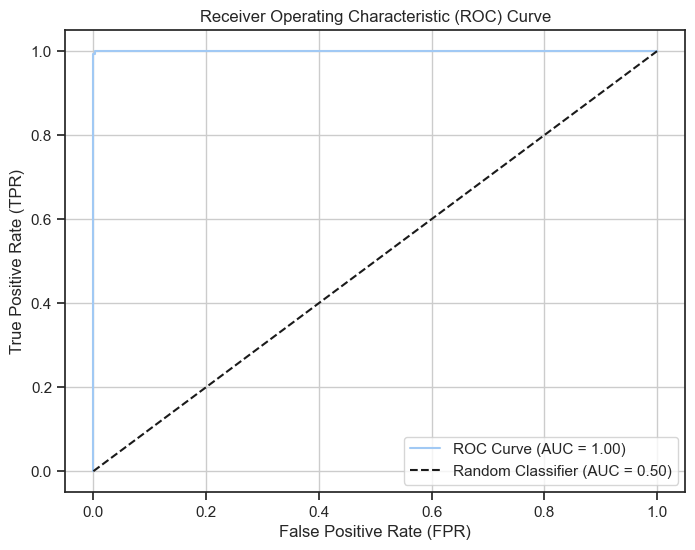

In [52]:
original_y_train_binary = [int(entry) for entry in np.where(original_y_train == 'M', 1, 0)]
expanded_prediction_probs_binary = [x[1] for x in expanded_prediction_probs]

fpr, tpr, thresholds = roc_curve(original_y_train_binary, expanded_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(original_y_train_binary, expanded_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

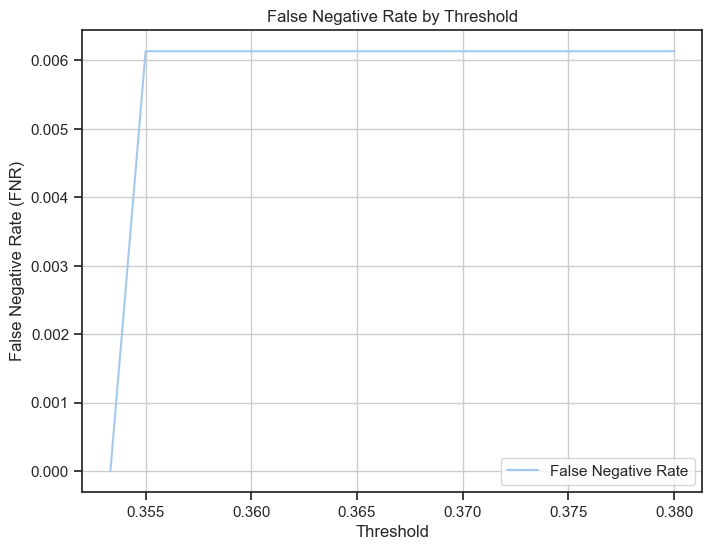

In [53]:
fpr, fnr, thresholds = det_curve(original_y_train_binary, expanded_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

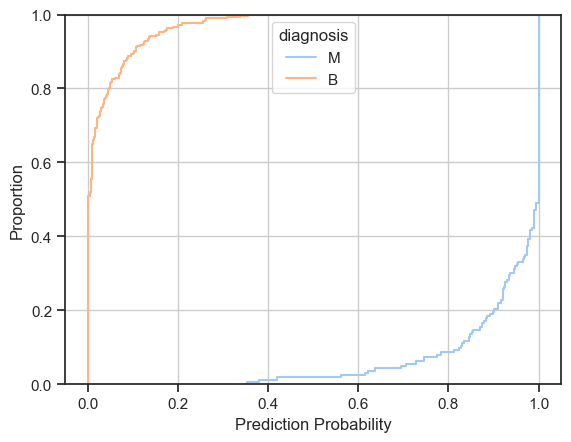

In [43]:
expanded_prediction_df = pd.DataFrame({'diagnosis': original_y_train, 
                                    'prediction' : expanded_predictions,
                                    'M_probability': [x[1] for x in expanded_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in expanded_prediction_probs]})

sns.ecdfplot(data=expanded_prediction_df,
             x='M_probability', hue='diagnosis')
plt.xlabel('Prediction Probability')
plt.grid(True)
plt.show()

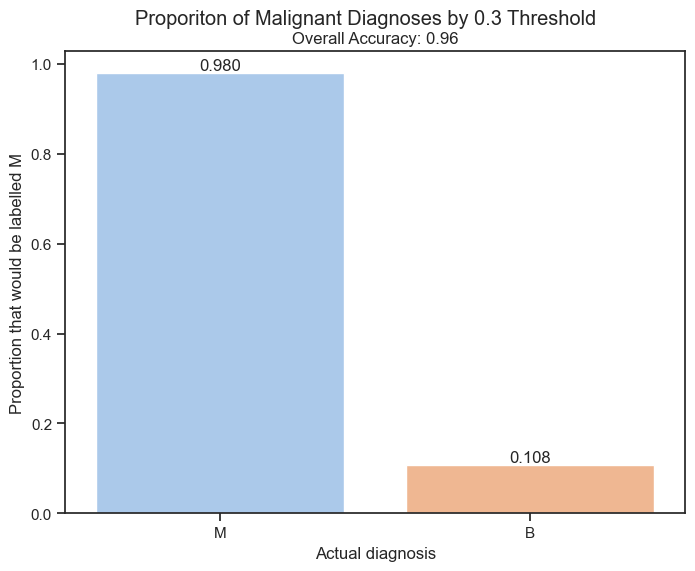

In [44]:
expanded_test_predictions = expanded_model.predict(original_X_test[expanded_model_cols])
expanded_test_prediction_probs = expanded_model.predict_proba(original_X_test[expanded_model_cols])

expanded_test_prediction_df = pd.DataFrame({'diagnosis': original_y_test, 
                                    'prediction' : expanded_test_predictions,
                                    'M_probability': [x[1] for x in expanded_test_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in expanded_test_prediction_probs],
                                    'is_above_30_percent': [x[1] > 0.3 for x in expanded_test_prediction_probs]})

fig, ax = plt.subplots(figsize=(8, 6))
bars = sns.barplot(data=expanded_test_prediction_df, x='diagnosis', 
                   y='is_above_30_percent', hue='diagnosis', ax=ax, errorbar=None)
ax.bar_label(bars.containers[0], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
ax.bar_label(bars.containers[1], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
plt.xlabel('Actual diagnosis')
plt.ylabel('Proportion that would be labelled M')
plt.suptitle('Proporiton of Malignant Diagnoses by 0.3 Threshold', y=0.95)
plt.title(f'Overall Accuracy: \
{round(accuracy_score(original_y_test, expanded_test_predictions, normalize=True, sample_weight=None), 2)}')
plt.show()

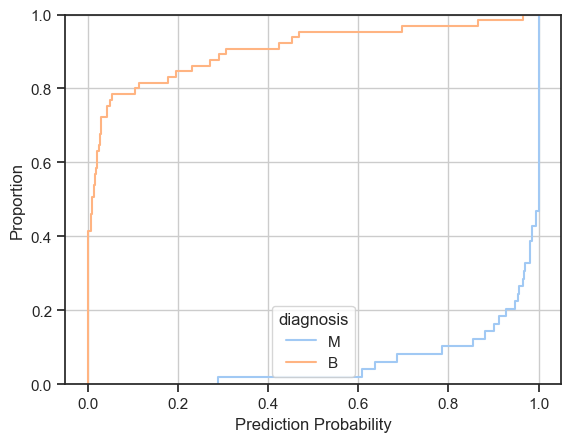

In [45]:
sns.ecdfplot(data=expanded_test_prediction_df,
             x='M_probability', hue='diagnosis')
plt.xlabel('Prediction Probability')
plt.grid(True)
plt.show()

## Examining the one M outlier

In [46]:
expanded_test_prediction_df[(expanded_test_prediction_df.M_probability < 0.2) &
                           (expanded_test_prediction_df.diagnosis == 'M')]

Empty DataFrame
Columns: [diagnosis, prediction, M_probability, prediction_probability, is_above_30_percent]
Index: []

In [47]:
cancer_dataset.iloc[38][['id', 'diagnosis'] + expanded_model_cols]

id                                          855133
diagnosis                                        M
radius_mean                                  14.99
texture_mean                                  25.2
perimeter_mean                               95.54
area_mean                                    698.8
smoothness_mean                            0.09387
compactness_mean                           0.05131
concavity_mean                             0.02398
concave points_mean                        0.02899
symmetry_mean                               0.1565
fractal_dimension_mean                     0.05504
radius_se                                    1.214
perimeter_se                                 8.077
area_se                                      106.0
compactness_se                             0.01094
concave points_se                          0.01917
radius_worst                                 14.99
texture_worst                                 25.2
perimeter_worst                

In [48]:
all_other_m = cancer_dataset.iloc[expanded_test_prediction_df[(expanded_test_prediction_df.M_probability > 0.3) &
                                                              (expanded_test_prediction_df.diagnosis == 'M')].index.tolist()]\
    [['id', 'diagnosis'] + expanded_model_cols]\
    .assign(id = 0).groupby(['id','diagnosis'], as_index=False).mean()

all_m = pd.concat([all_other_m, cancer_dataset.iloc[38,][['id', 'diagnosis'] + expanded_model_cols].to_frame().T]).T\
    .drop(['id', 'diagnosis'], axis=0)

In [49]:
all_m[0] - all_m[38]

radius_mean                                 3.260208
texture_mean                               -3.518333
perimeter_mean                             25.133333
area_mean                                  355.14375
smoothness_mean                             0.008745
compactness_mean                            0.099418
concavity_mean                               0.14647
concave points_mean                         0.065996
symmetry_mean                               0.038173
fractal_dimension_mean                      0.006971
radius_se                                   -0.56116
perimeter_se                               -3.518125
area_se                                   -25.338333
compactness_se                              0.020913
concave points_se                          -0.004835
radius_worst                                7.089792
texture_worst                               3.312292
perimeter_worst                             52.15375
area_worst                                822.